In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [55]:
df=pd.read_csv('WorldHappiness_Corruption_2015_2020.csv')
df.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [56]:
df.shape

(792, 13)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [58]:
#Target variable ---> Happiness Score

In [59]:
df.isnull().sum()  # No of missing values in the dataset

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64

In [60]:
for i in df.columns:
    print("{} columns has {} no of unique_values".format(i,df[i].nunique()))

Country columns has 132 no of unique_values
happiness_score columns has 747 no of unique_values
gdp_per_capita columns has 767 no of unique_values
family columns has 396 no of unique_values
health columns has 733 no of unique_values
freedom columns has 734 no of unique_values
generosity columns has 707 no of unique_values
government_trust columns has 682 no of unique_values
dystopia_residual columns has 529 no of unique_values
continent columns has 6 no of unique_values
Year columns has 6 no of unique_values
social_support columns has 360 no of unique_values
cpi_score columns has 77 no of unique_values


In [61]:
categorical_fea=[i for i in df.columns if df[i].dtype=='O']
categorical_fea

['Country', 'continent']

### Univariate and Bivariate analysis of Categorical features

<AxesSubplot:xlabel='Country'>

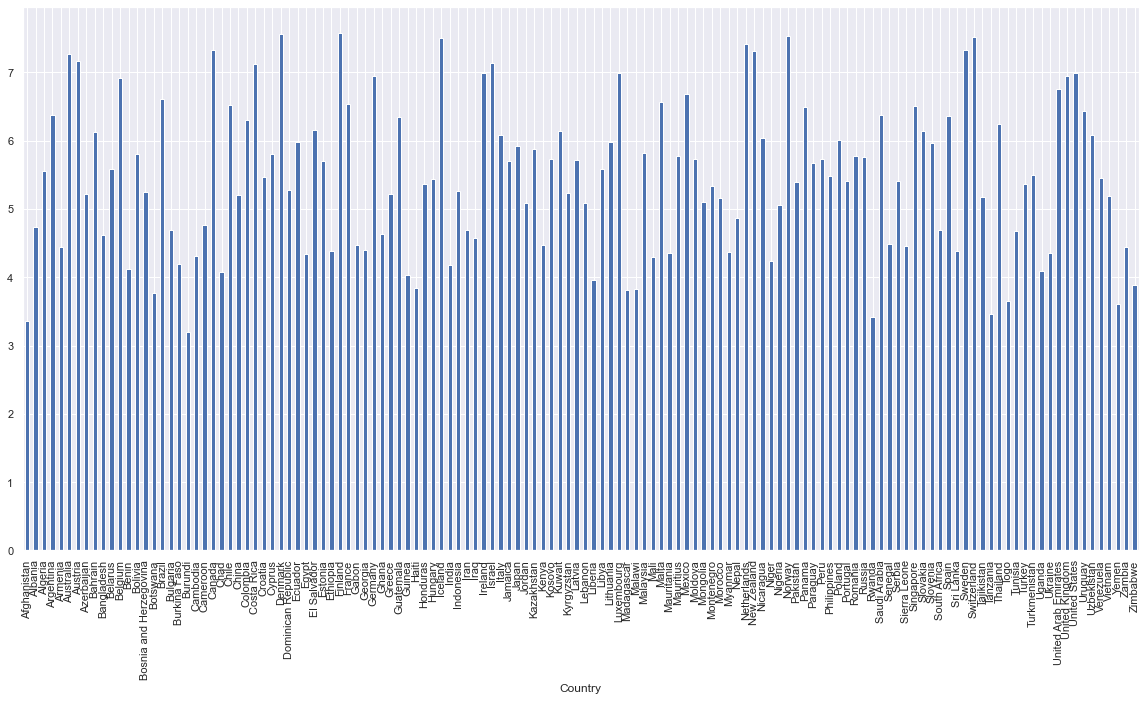

In [62]:
plt.figure(figsize=(20,10))
df.groupby(['Country'])['happiness_score'].mean().plot.bar()  

In [63]:
#Try to understand a general trend by splitting the data rather than considering the whole data

Country_count: 19


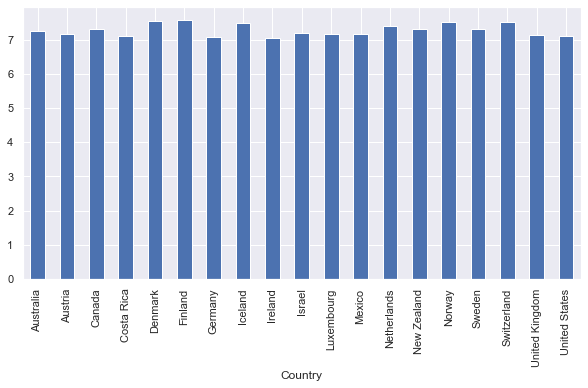

In [64]:
plt.figure(figsize=(10,5))
c=df[df.happiness_score>7]
print("Country_count:",c.Country.nunique());
c.groupby(['Country'])['happiness_score'].mean().plot.bar();

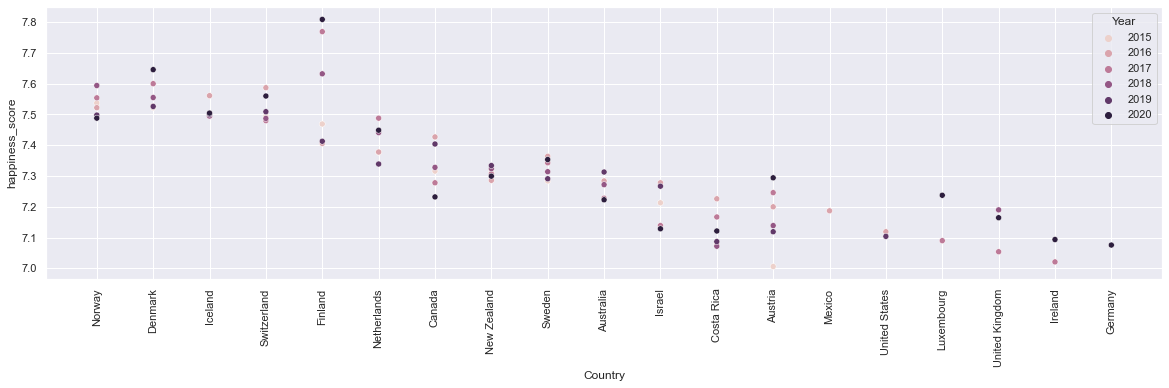

In [65]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=c,x='Country',y='happiness_score',hue='Year');
plt.xticks(rotation=90);

Country_count: 44


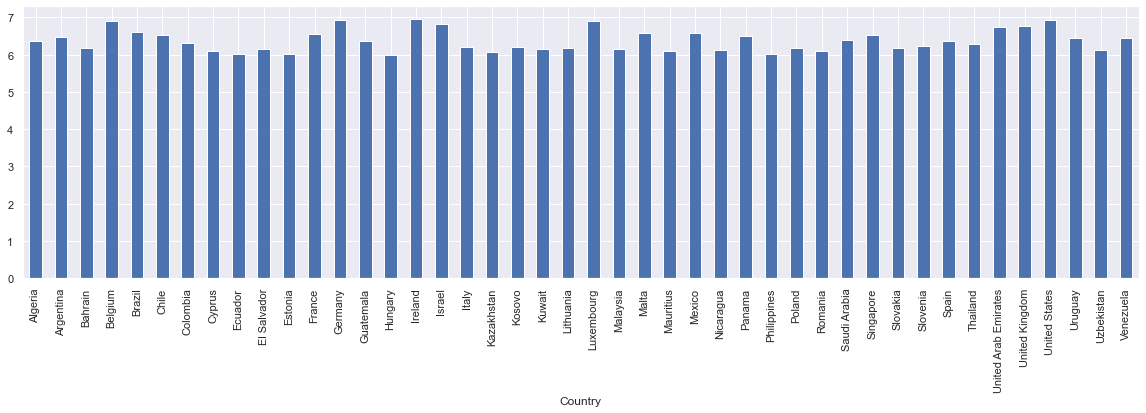

In [66]:
plt.figure(figsize=(20,5))
d=df[(df.happiness_score<7) & (df.happiness_score>=6)]
print("Country_count:",d.Country.nunique());
d.groupby(['Country'])['happiness_score'].mean().plot.bar();

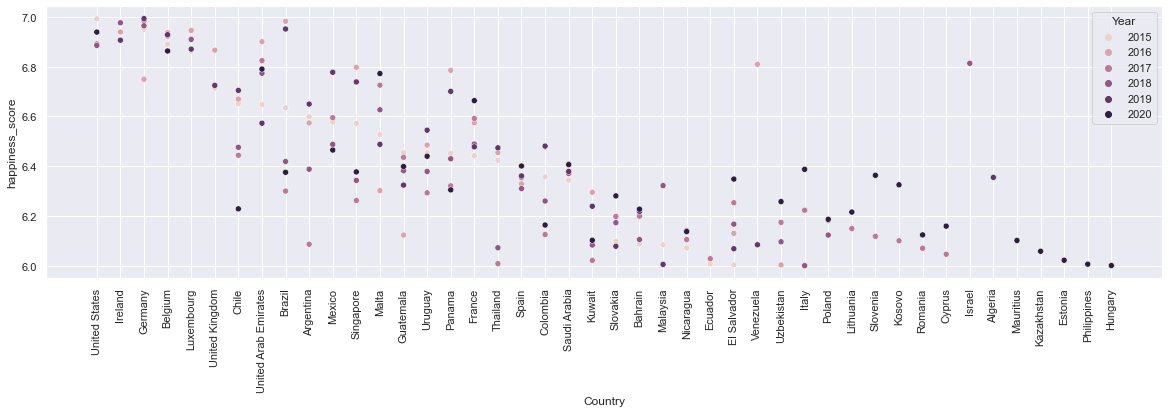

In [67]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=d,x='Country',y='happiness_score',hue='Year');
plt.xticks(rotation=90);

Country_count: 55


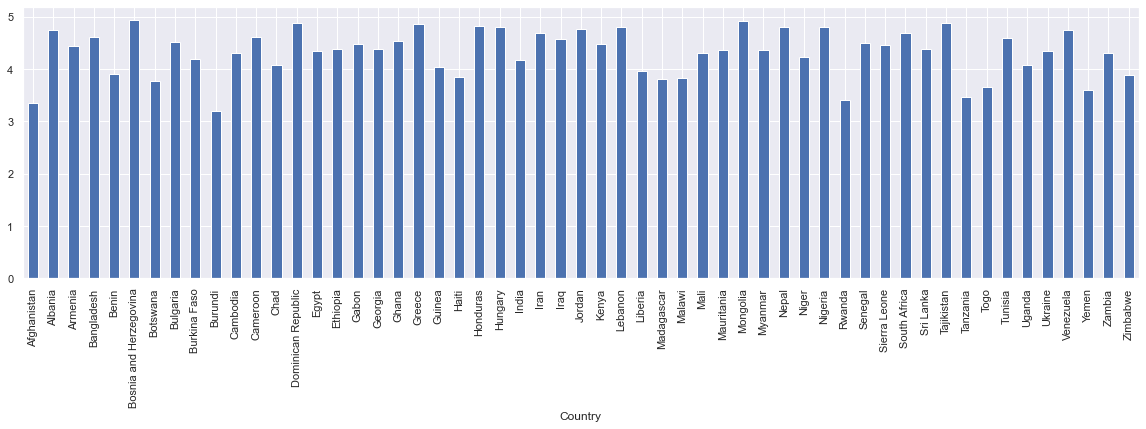

In [68]:
plt.figure(figsize=(20,5))
f=df[df.happiness_score<5]
print("Country_count:",f.Country.nunique());
f.groupby(['Country'])['happiness_score'].mean().plot.bar();

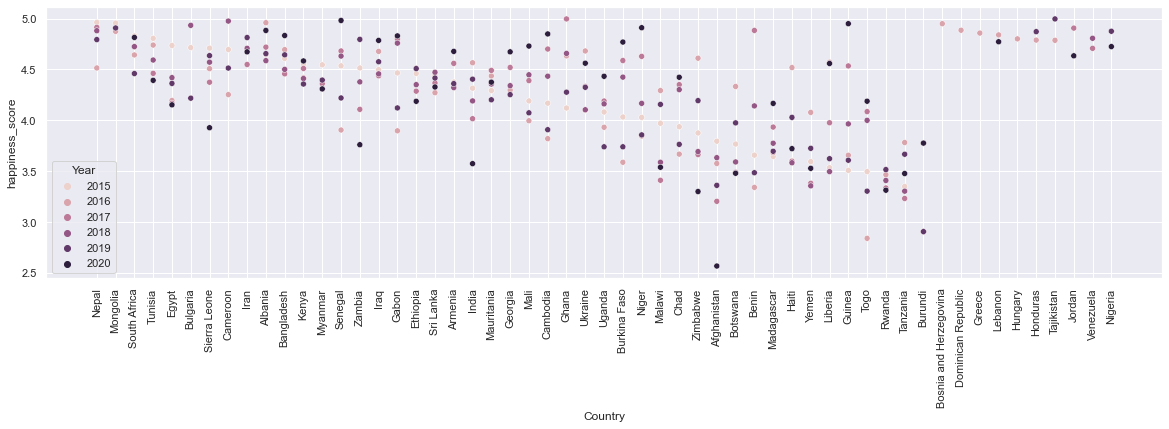

In [69]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=f,x='Country',y='happiness_score',hue='Year');
plt.xticks(rotation=90);

In [70]:
k=df[df.Country=='India']
k

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
107,India,4.3150,0.792221,0.754373,0.455428,0.469987,0.231538,0.092227,1.519117,Asia,2015,0.000000,38
231,India,4.5650,0.644990,0.381740,0.515290,0.397860,0.264750,0.084920,2.275130,Asia,2016,0.000000,40
384,India,4.0150,0.755000,0.000000,0.588000,0.498000,0.200000,0.085000,0.000000,Asia,2017,0.765000,40
510,India,4.1900,0.721000,0.000000,0.485000,0.539000,0.172000,0.093000,0.000000,Asia,2018,0.747000,41
628,India,4.4040,0.740360,0.292470,0.450910,0.402850,0.250280,0.087220,2.180320,Asia,2019,0.000000,41
784,India,3.5733,0.730576,0.000000,0.540570,0.581142,0.237072,0.105588,0.734131,Asia,2020,0.644199,40


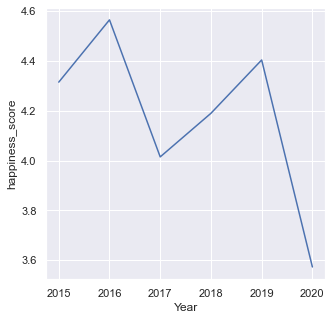

In [71]:
plt.figure(figsize=(5,5))
sns.lineplot(data=k,x='Year',y='happiness_score',markers='+');

#### Average Happiness score of each continent

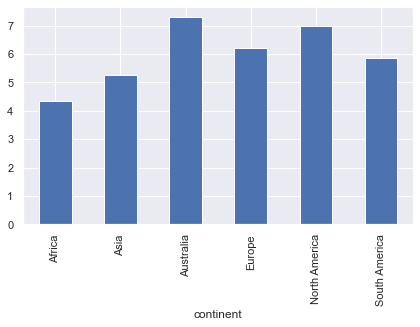

In [72]:
plt.figure(figsize=(7,4))
df.groupby(['continent'])['happiness_score'].mean().plot.bar();

### Happiness scores of countries in each Continent

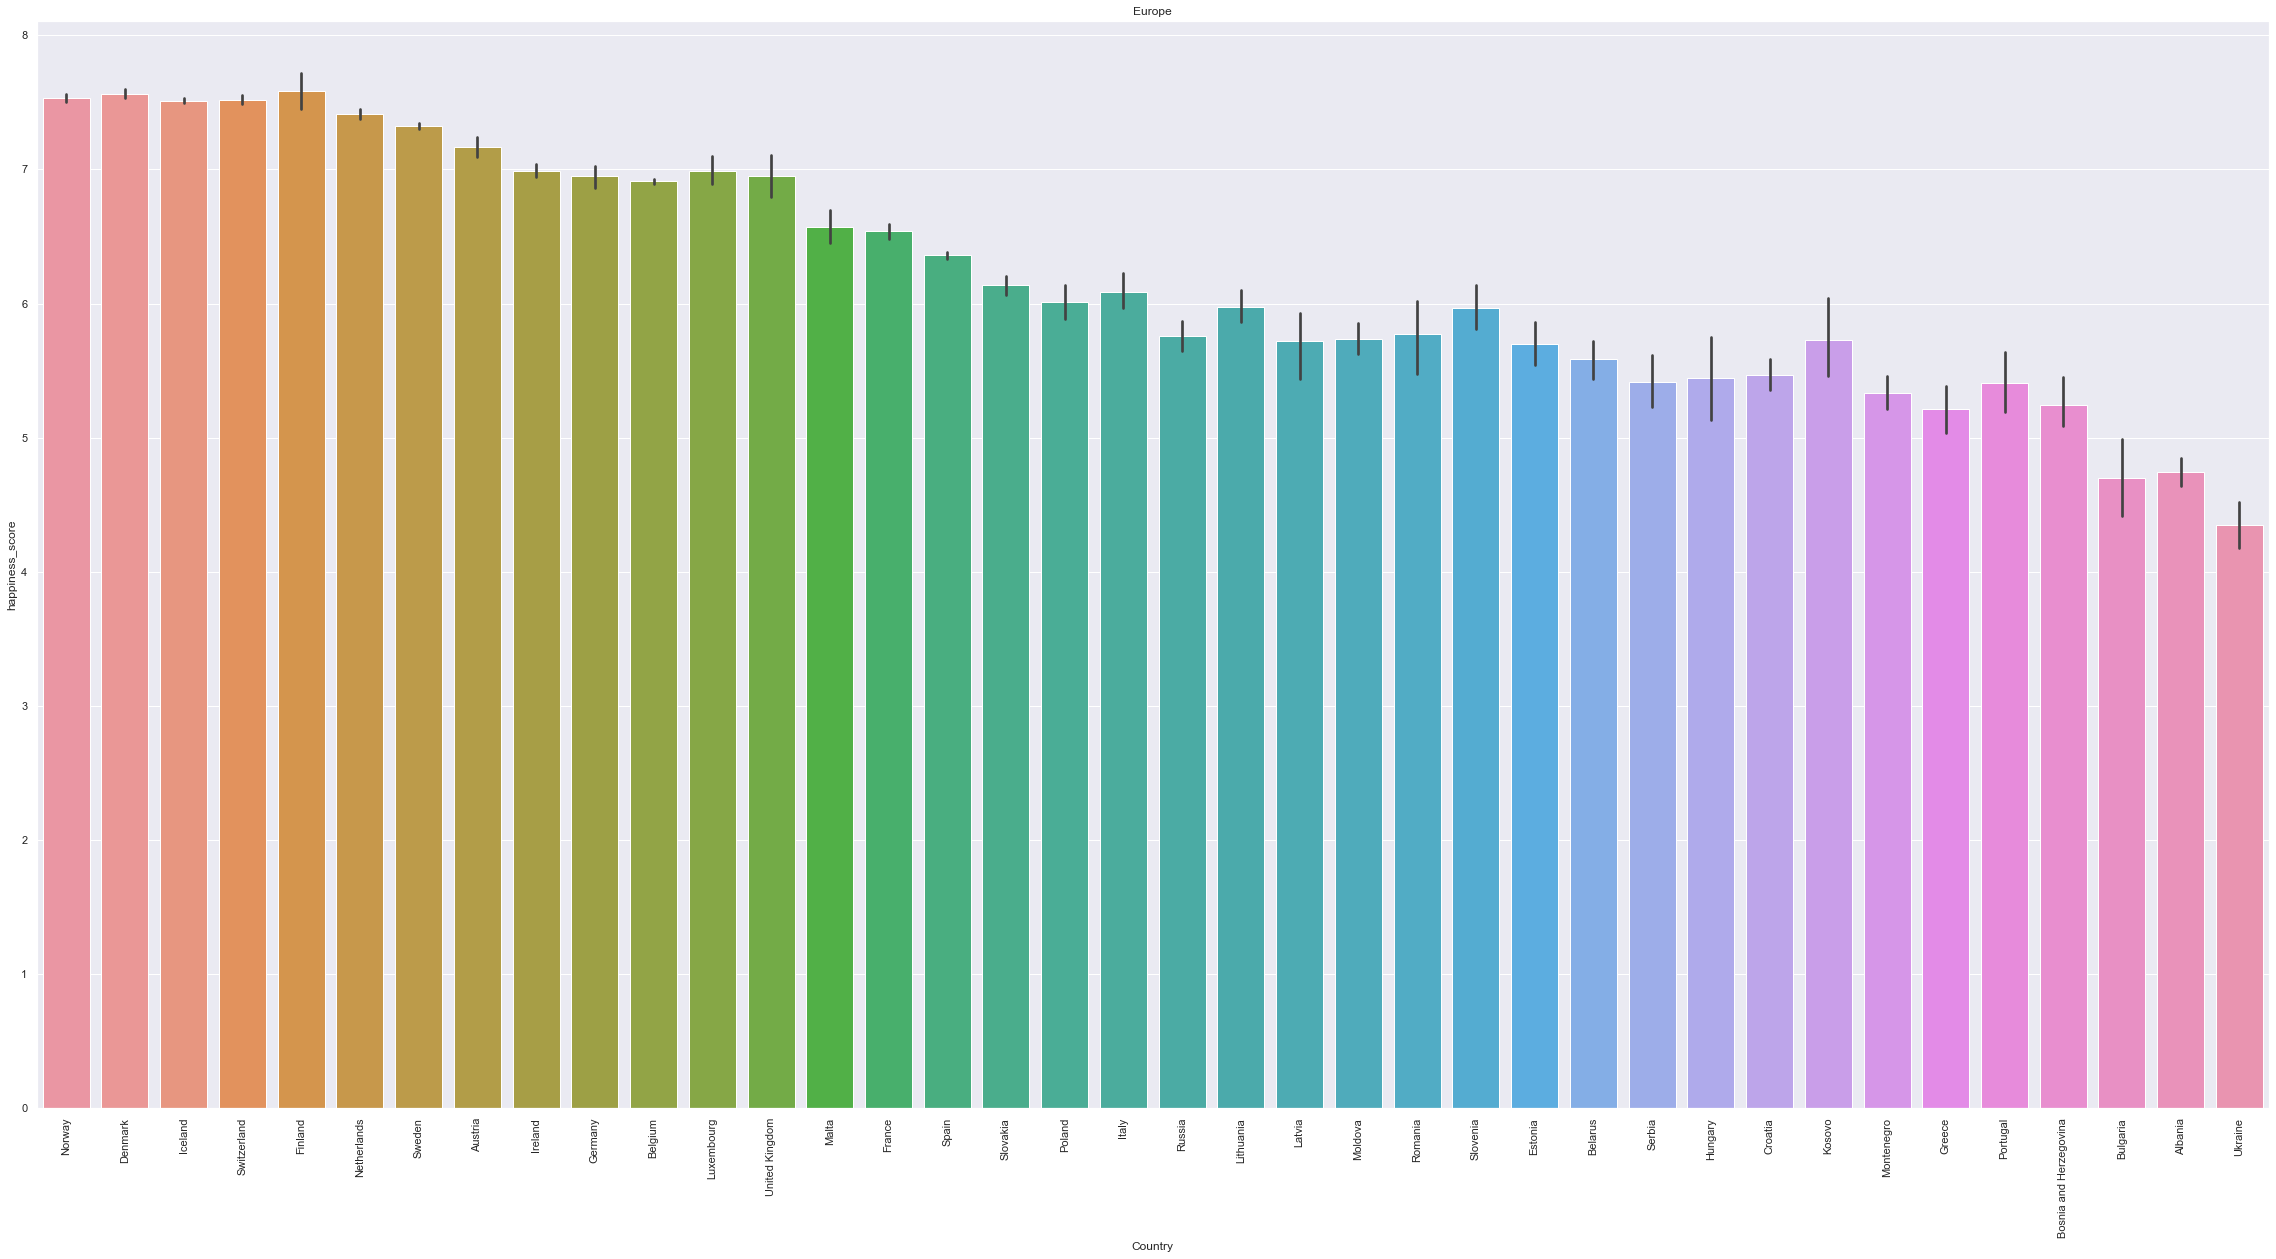

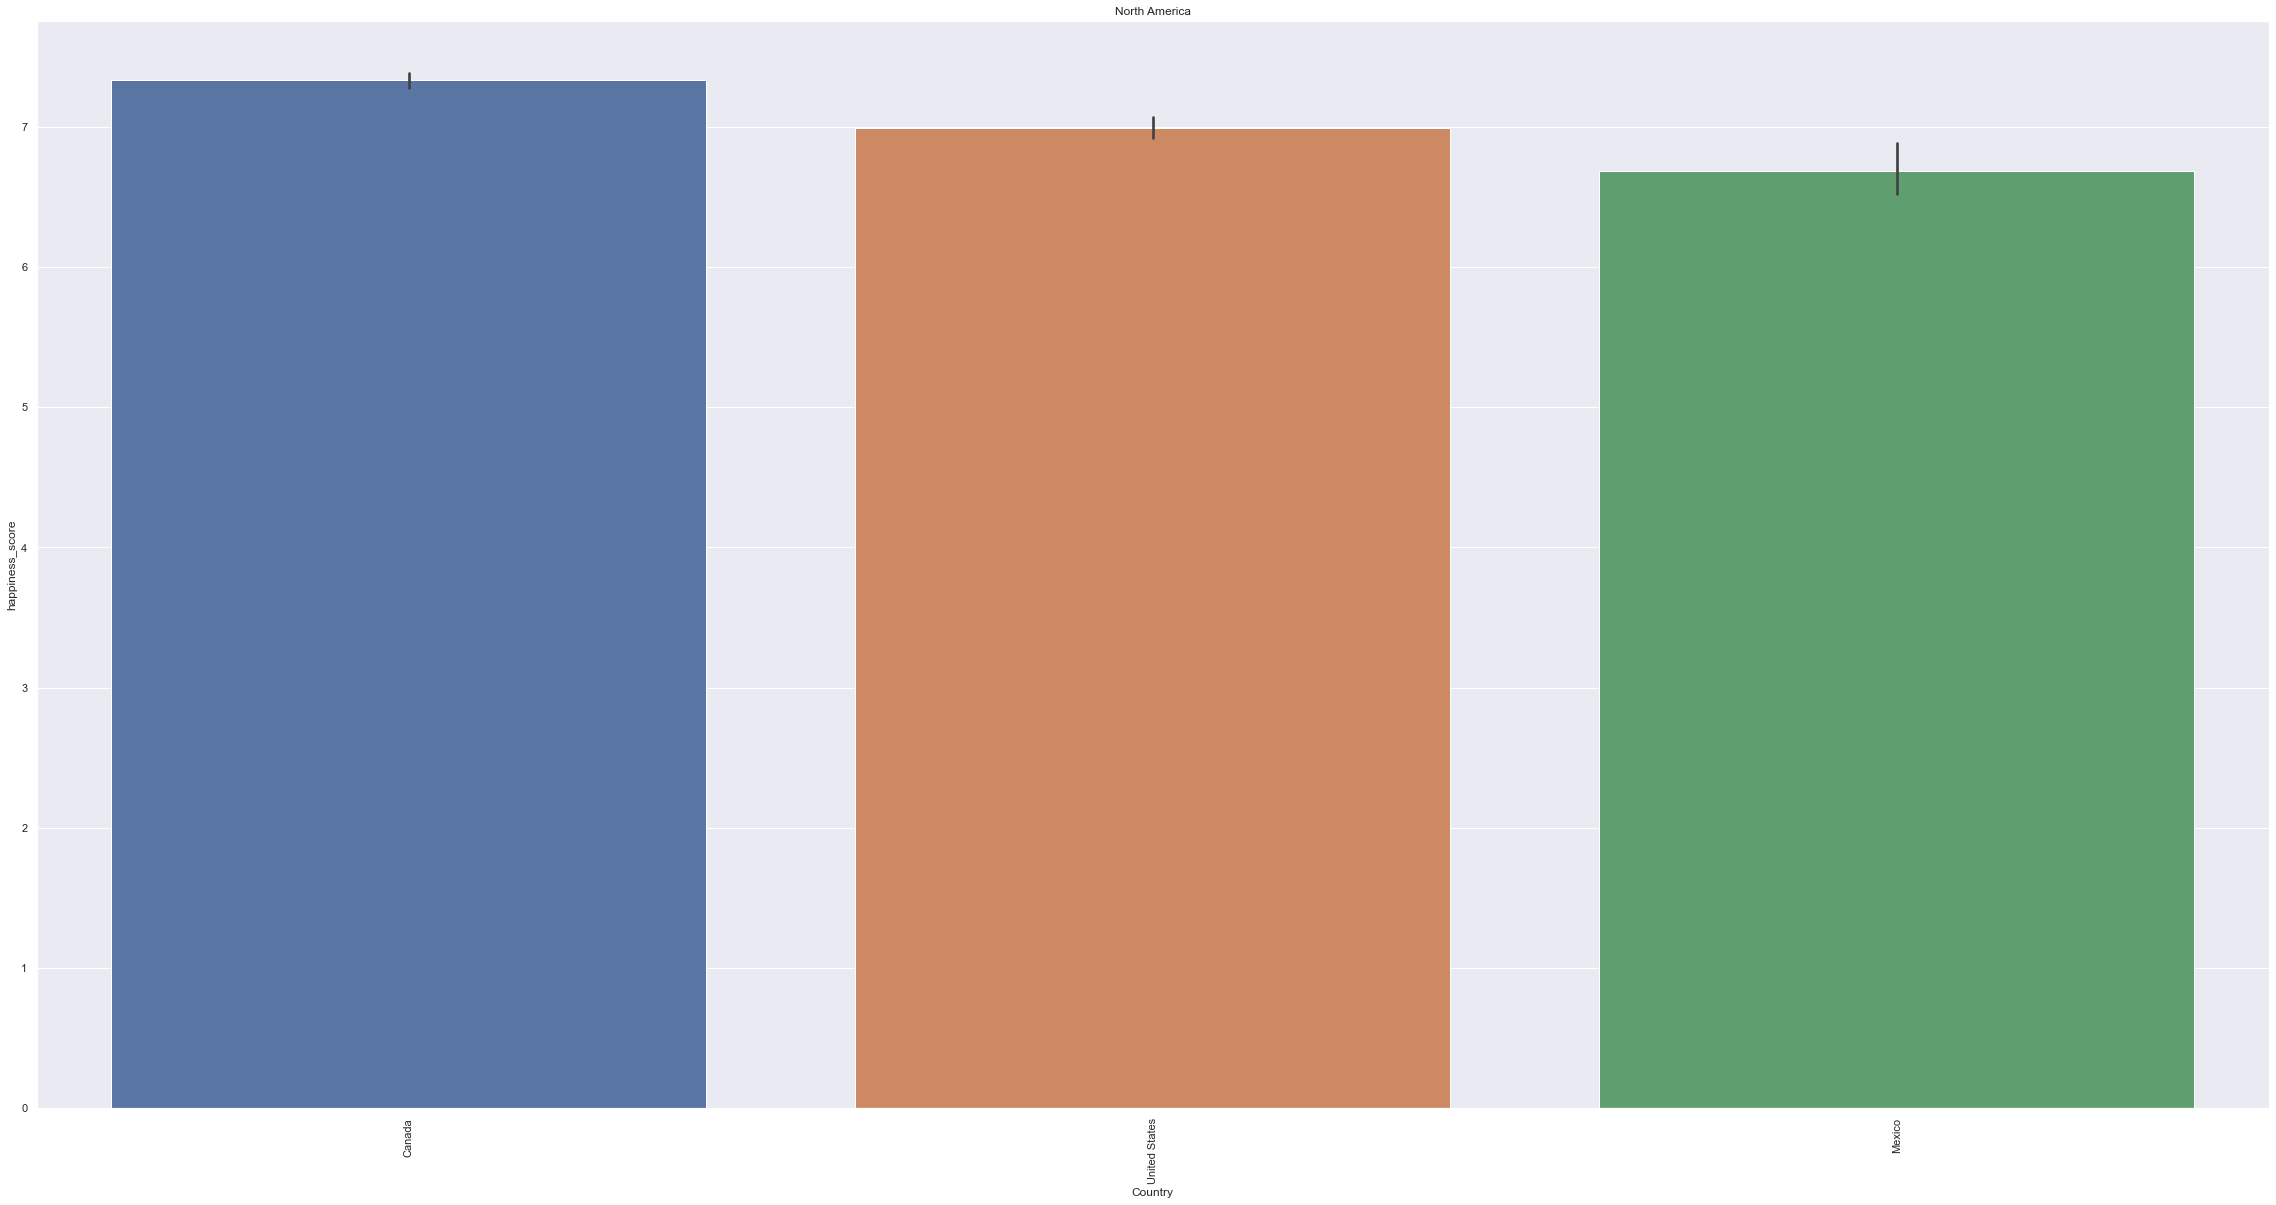

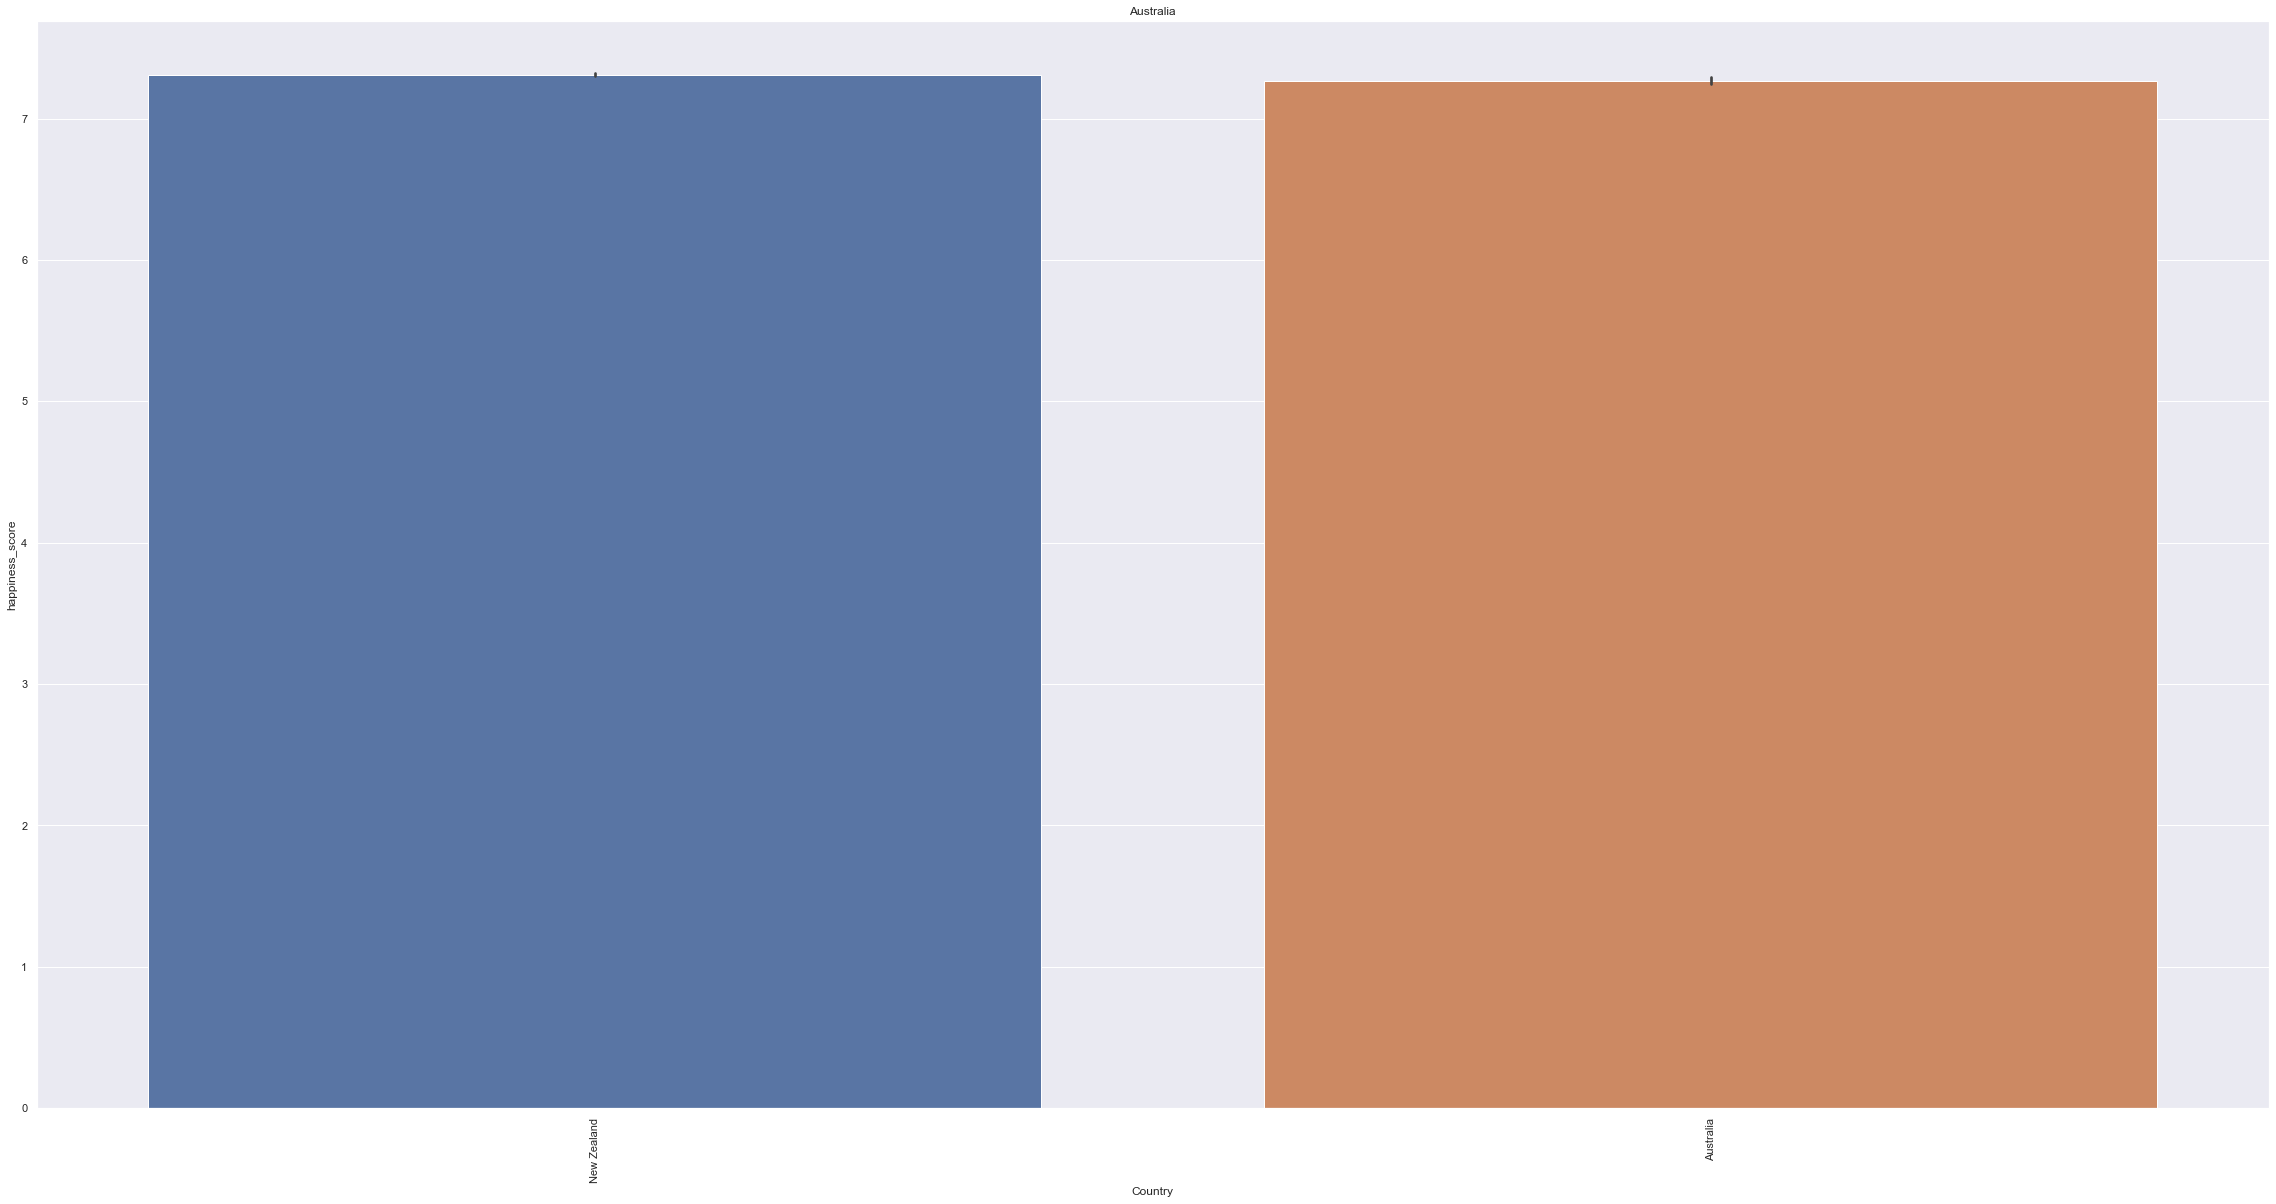

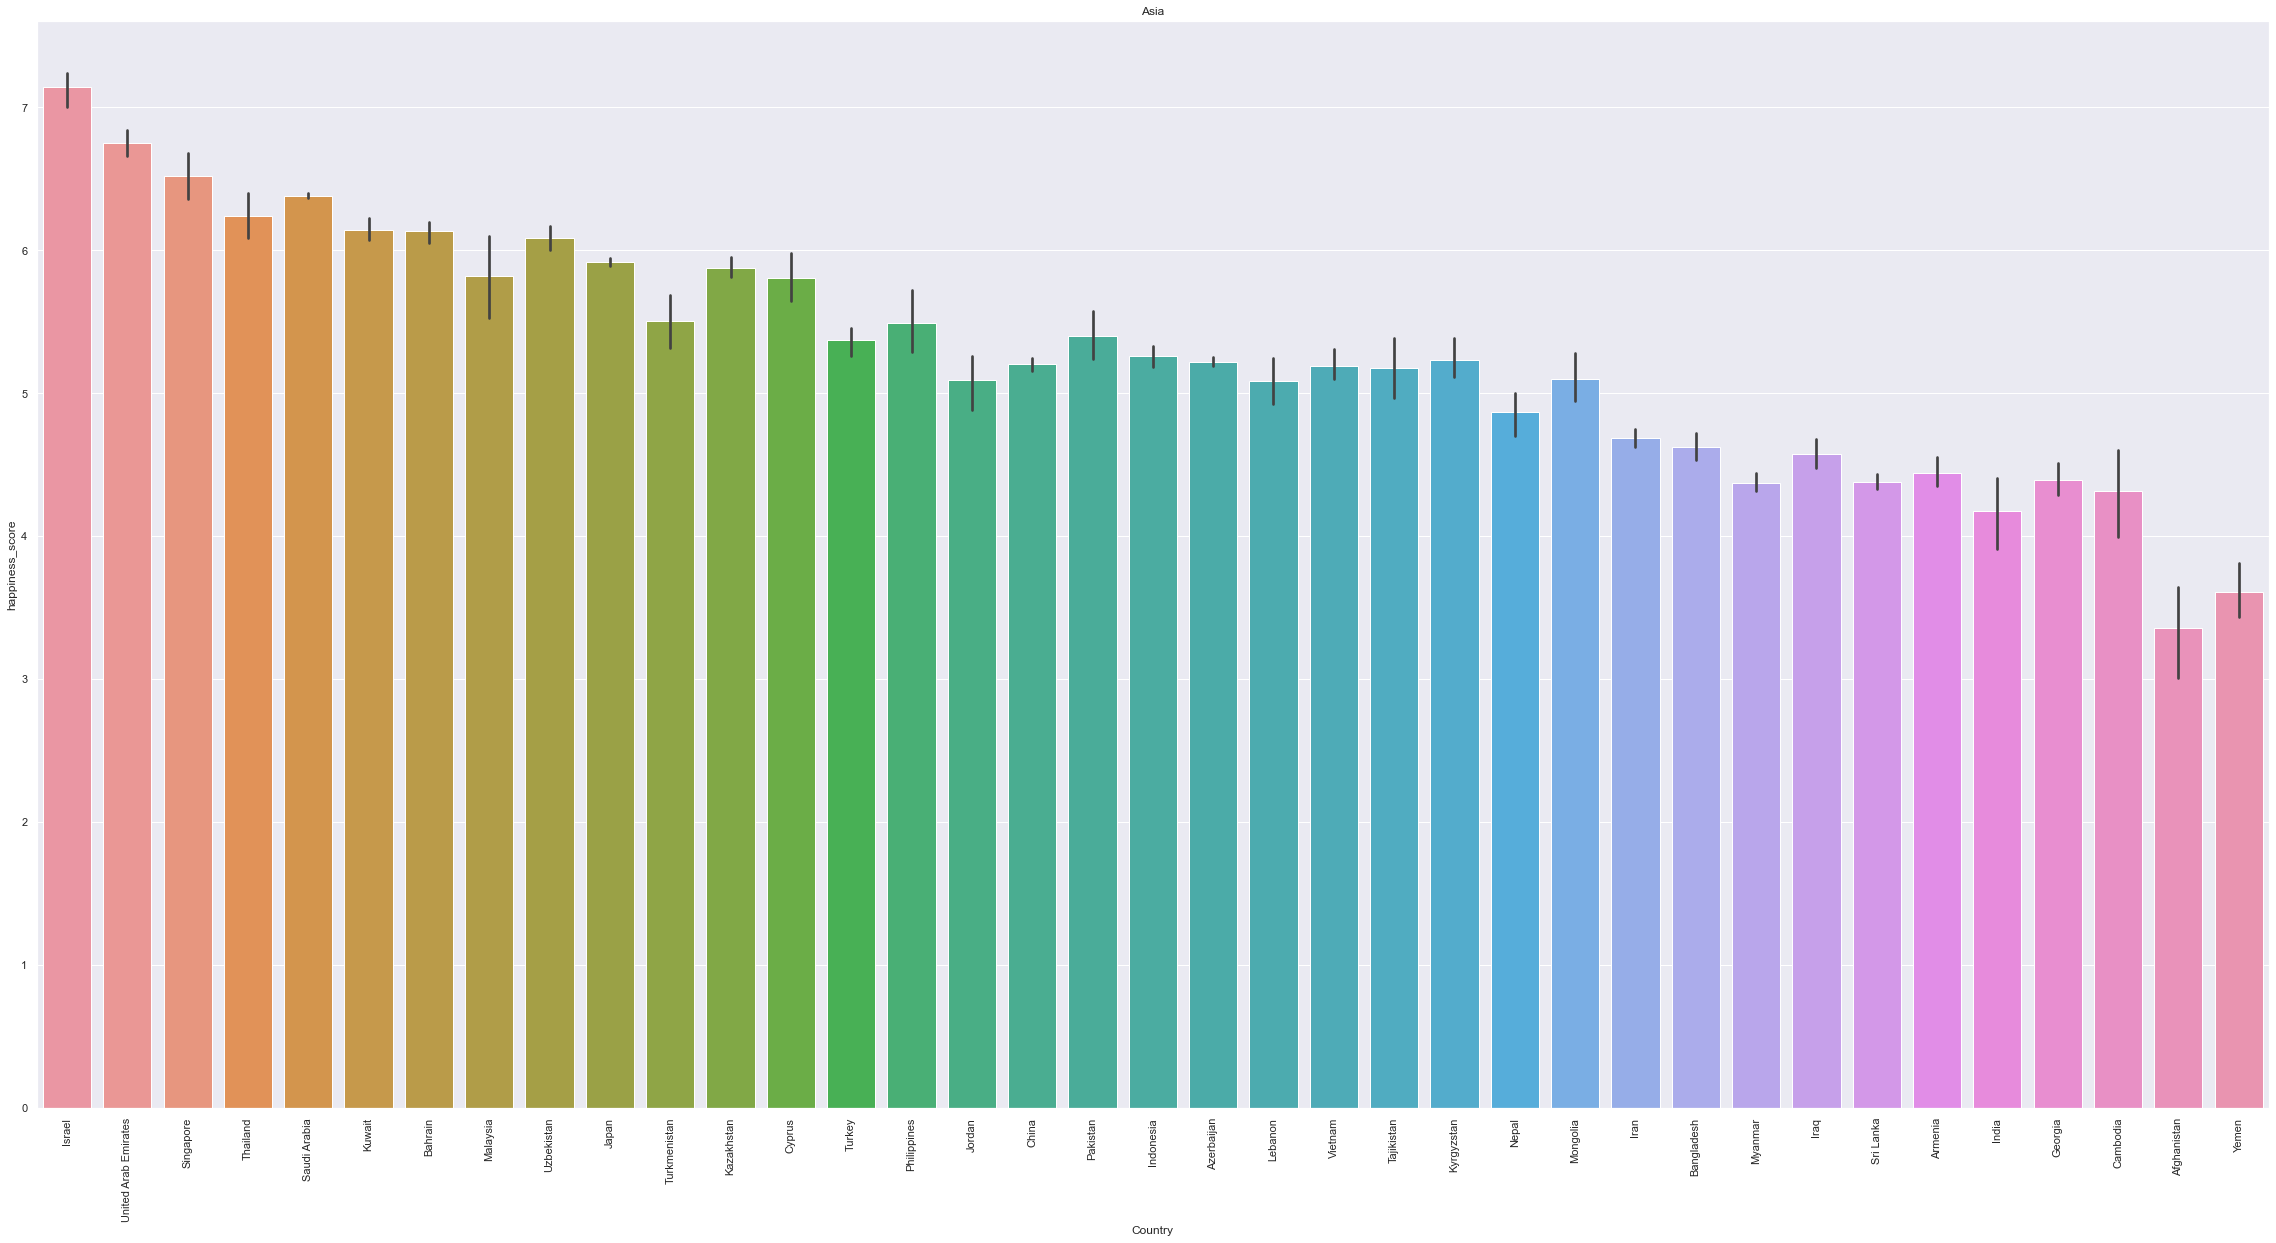

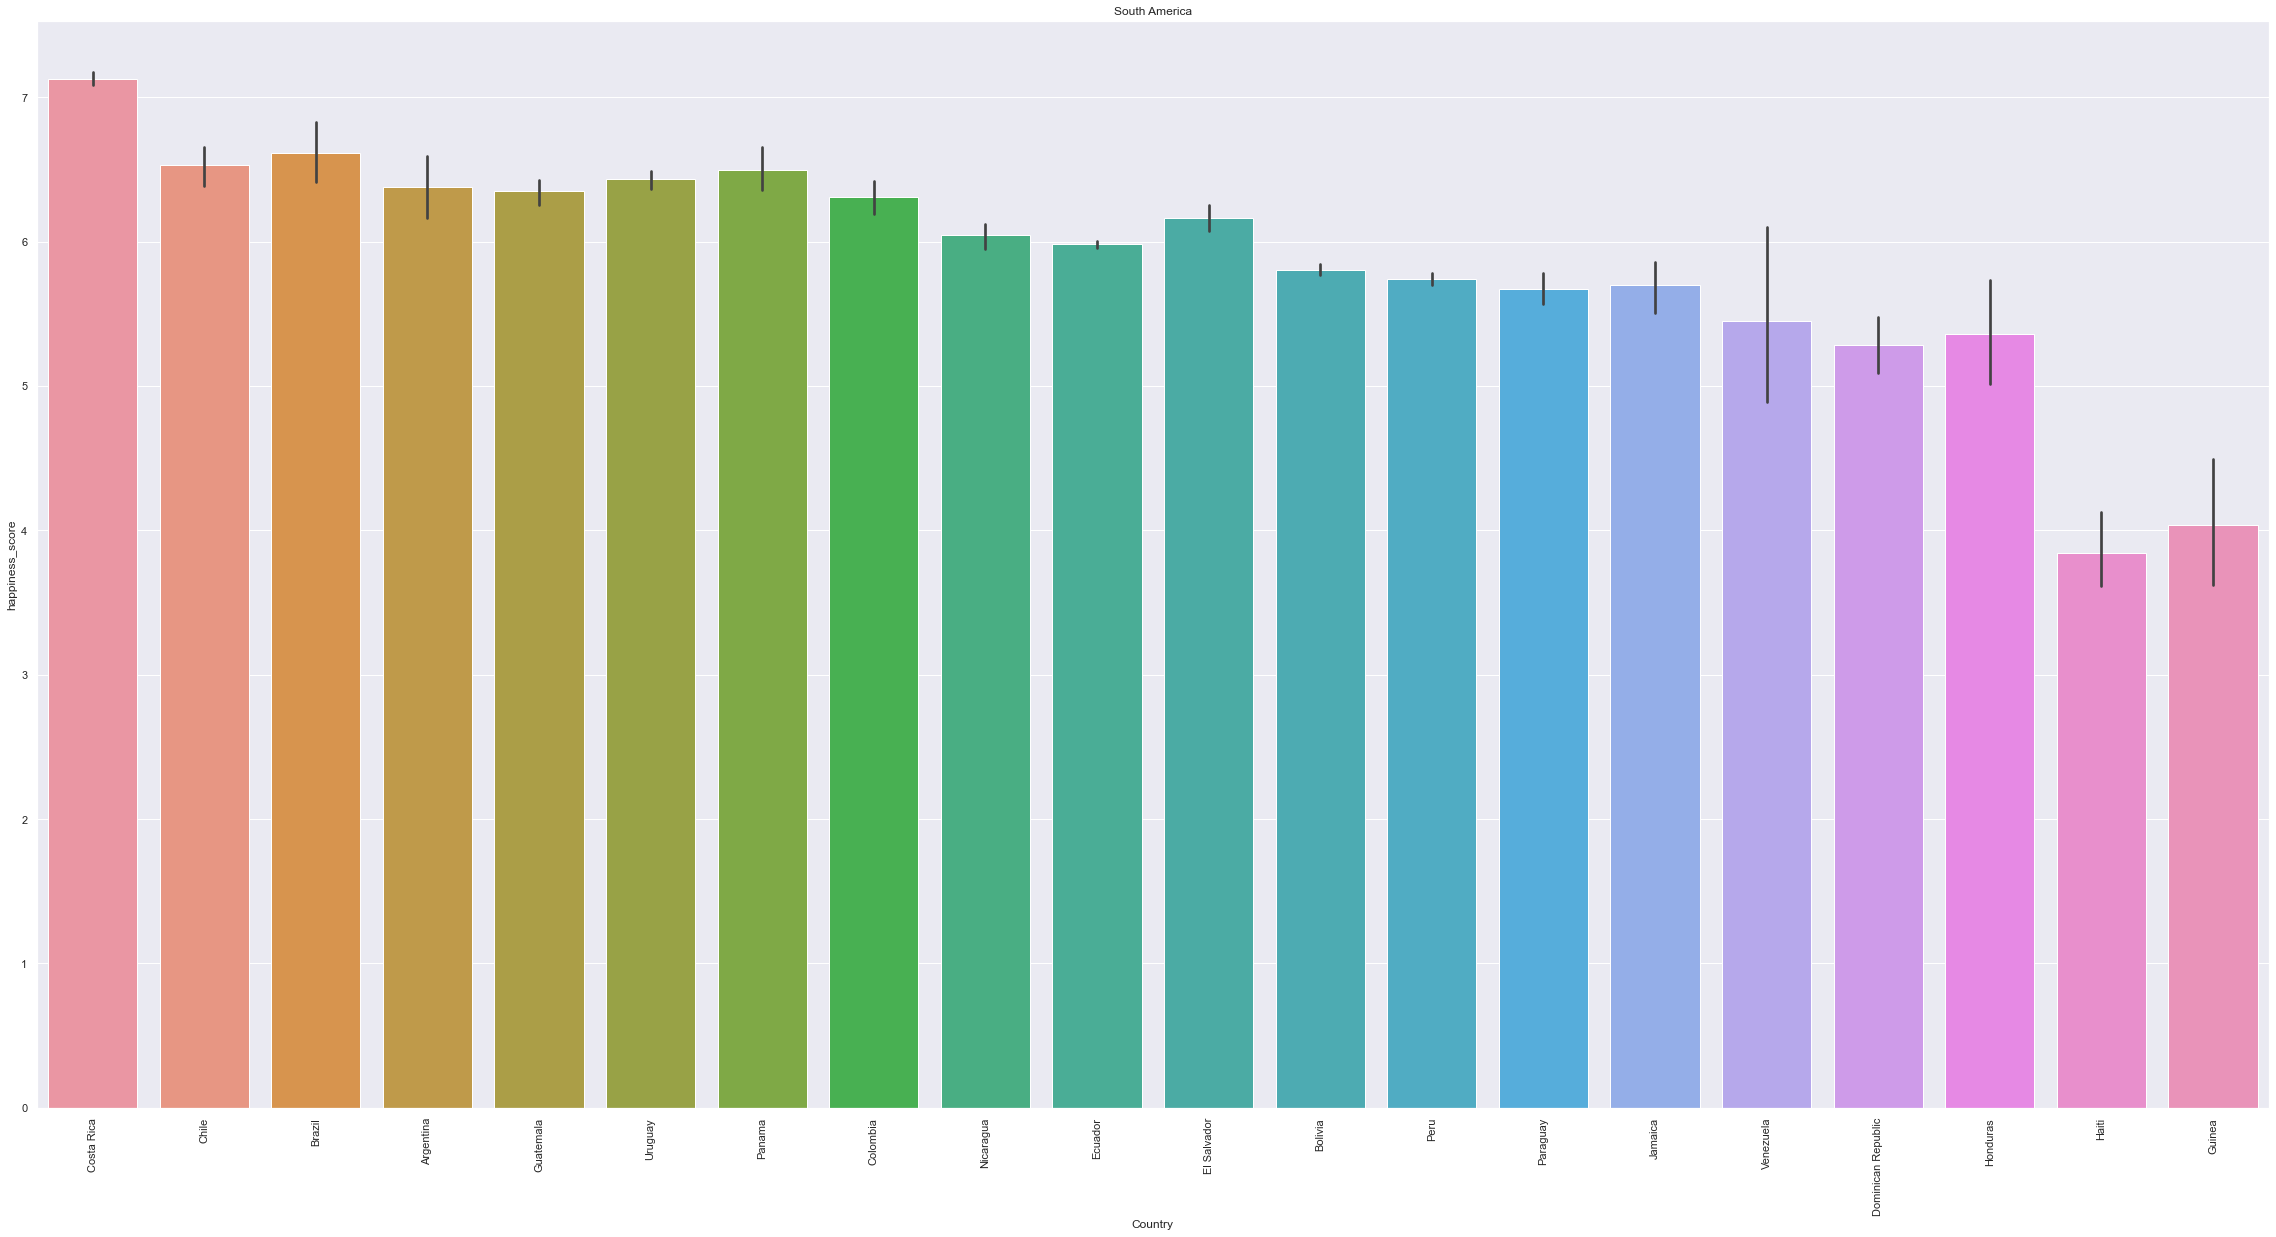

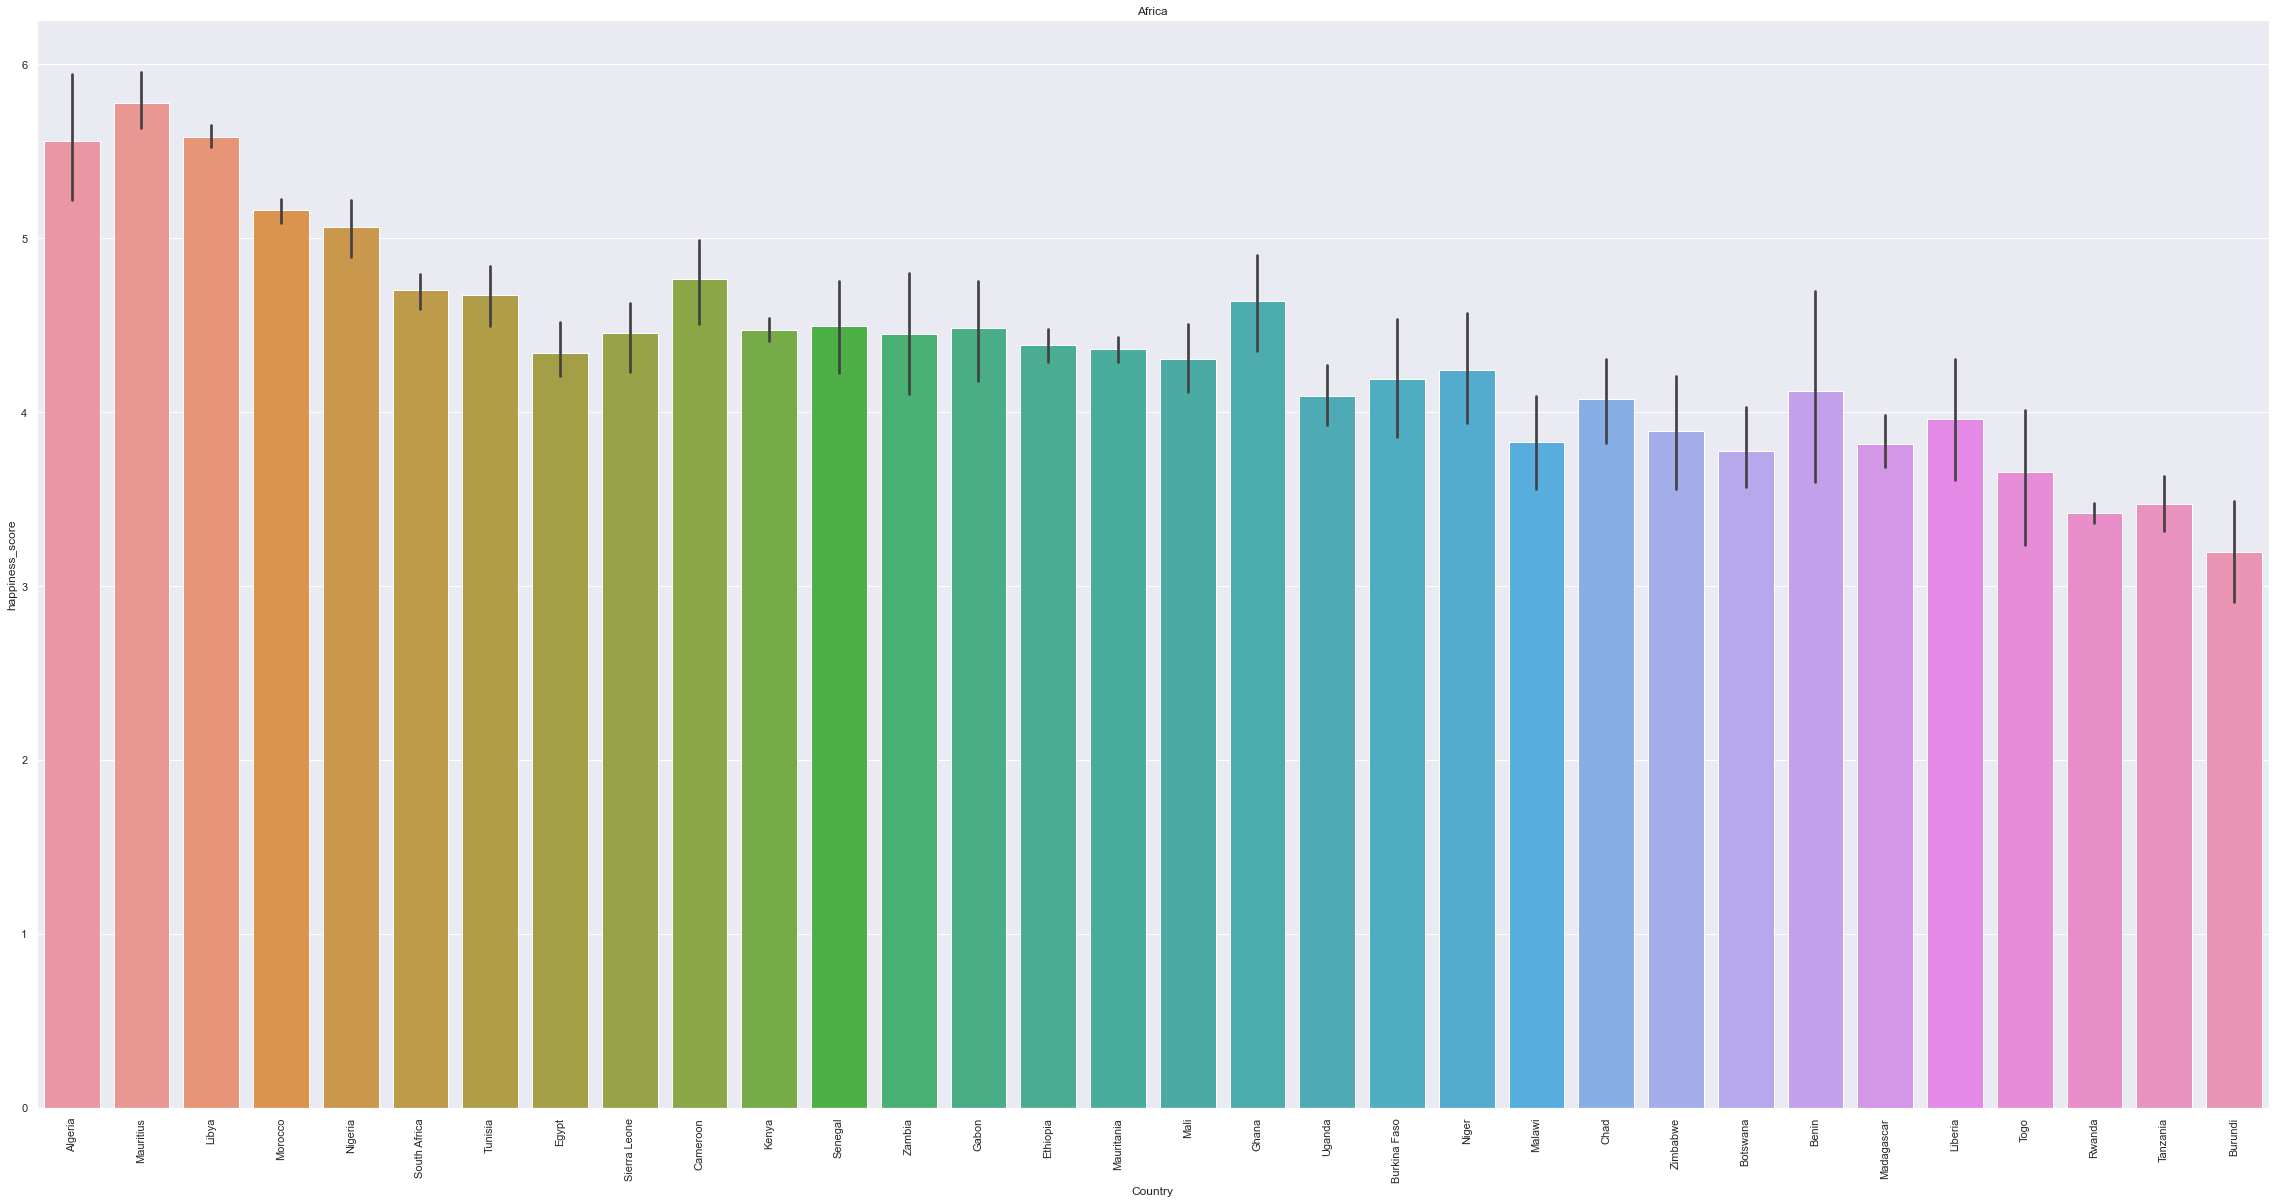

In [73]:
for i in df.continent.unique():
    plt.figure(figsize=(40,20))
    plt.title(i)
    z=df[df.continent==i]
    sns.barplot(data=z,x='Country',y='happiness_score');
    plt.xticks(rotation=90);

In [221]:
categorical_fea

['Country', 'continent']

### Findings from the above analysis

a) Findings related to Categorical variables (Findings were infered from barplots b/w HI vs cat)

1. Europe,Australia and North America are the continents having highest avg happiness index

2. Europe has the highest count of coutries having HI>7 (eg. Finland,Denmark,Norway,switzerland,Iceland....)

3. Followed by Australia and North america

4. Most of the countries in south america have happiness index greater than 5.8

5. In Asia, Isarel has HI > 7. In Asia, most of the countries HI are between 5 and 6

6. Most of countries having Lowest HI are from Africa and most of the countires in Africa has an HI<5

7. Afghanistan and Burundi are the 2 countries that have the least HI among all countries

In [75]:
numerical_fea=[i for i in df.columns if i not in categorical_fea]
numerical_fea

['happiness_score',
 'gdp_per_capita',
 'family',
 'health',
 'freedom',
 'generosity',
 'government_trust',
 'dystopia_residual',
 'Year',
 'social_support',
 'cpi_score']

In [76]:
len(numerical_fea)

11

In [77]:
df[numerical_fea].head()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2015,0.0,88
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2015,0.0,91
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2015,0.0,79
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2015,0.0,86
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2015,0.0,90


### Univariate and Bivariate analysis of Numerical Features

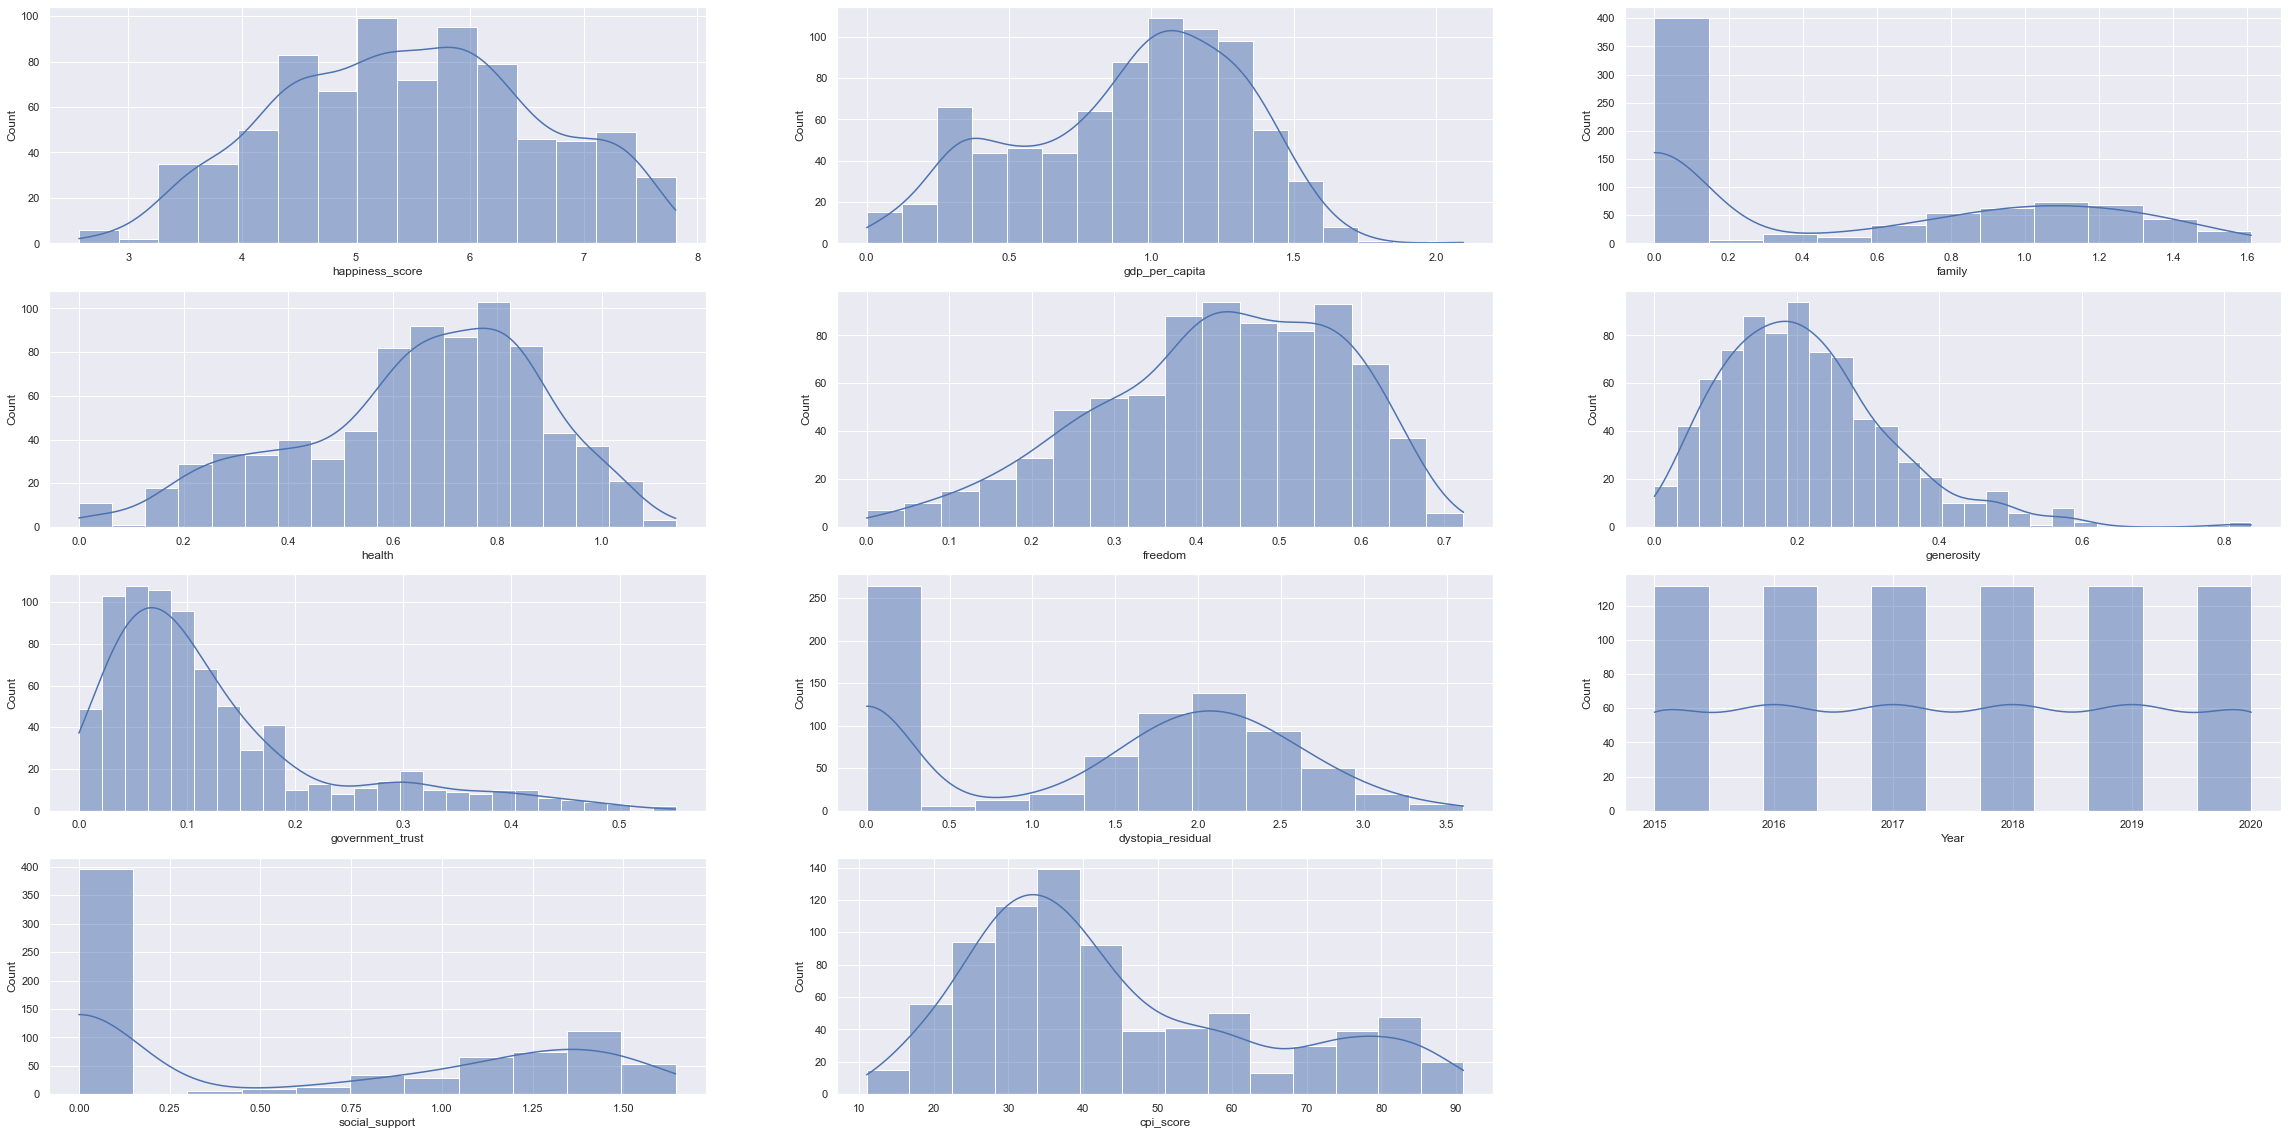

In [78]:
c=1
plt.figure(figsize=(40,20))
for i in numerical_fea:
    plt.subplot(4,3,c)
    #plt.title(i)
    sns.set(rc={'figure.figsize':(10,10)})
    sns.histplot(data=df,x=i,kde=True)
    c+=1

In [79]:
df[(df.happiness_score>4.5) & (df.happiness_score<6.5)].count()

Country              471
happiness_score      471
gdp_per_capita       471
family               471
health               471
freedom              471
generosity           471
government_trust     471
dystopia_residual    471
continent            471
Year                 471
social_support       471
cpi_score            471
dtype: int64

In [80]:
df[(df["gdp_per_capita"]>0.8) & (df["gdp_per_capita"]<1.5) ].count()

Country              496
happiness_score      496
gdp_per_capita       496
family               496
health               496
freedom              496
generosity           496
government_trust     496
dystopia_residual    496
continent            496
Year                 496
social_support       496
cpi_score            496
dtype: int64

In [81]:
df.columns

Index(['Country', 'happiness_score', 'gdp_per_capita', 'family', 'health',
       'freedom', 'generosity', 'government_trust', 'dystopia_residual',
       'continent', 'Year', 'social_support', 'cpi_score'],
      dtype='object')

In [82]:
df[(df.health>0.6) & (df.health<0.9)].count()  

Country              424
happiness_score      424
gdp_per_capita       424
family               424
health               424
freedom              424
generosity           424
government_trust     424
dystopia_residual    424
continent            424
Year                 424
social_support       424
cpi_score            424
dtype: int64

In [83]:
df[(df.freedom>0.35)&(df.freedom)<0.65].count()

Country              221
happiness_score      221
gdp_per_capita       221
family               221
health               221
freedom              221
generosity           221
government_trust     221
dystopia_residual    221
continent            221
Year                 221
social_support       221
cpi_score            221
dtype: int64

In [84]:
df.corr()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
happiness_score,1.000000,0.793267,0.154946,0.753534,0.544284,0.155419,0.455477,0.174161,0.023495,0.192633,0.693001
gdp_per_capita,0.793267,1.000000,0.218191,0.774980,0.340260,-0.018355,0.359068,0.042710,-0.035782,0.111701,0.704483
family,0.154946,0.218191,1.000000,-0.054683,0.013833,0.245437,0.114767,0.600243,-0.588630,-0.869885,0.132031
health,0.753534,0.774980,-0.054683,1.000000,0.381869,-0.028882,0.312741,-0.073157,0.070172,0.347438,0.644478
freedom,0.544284,0.340260,0.013833,0.381869,1.000000,0.306240,0.473980,-0.015270,0.058195,0.208709,0.482923
generosity,0.155419,-0.018355,0.245437,-0.028882,0.306240,1.000000,0.280039,0.147750,-0.109797,-0.215131,0.165972
government_trust,0.455477,0.359068,0.114767,0.312741,0.473980,0.280039,1.000000,0.098366,0.021781,-0.008136,0.620089
dystopia_residual,0.174161,0.042710,0.600243,-0.073157,-0.015270,0.147750,0.098366,1.000000,0.057519,-0.654570,0.032630
Year,0.023495,-0.035782,-0.588630,0.070172,0.058195,-0.109797,0.021781,0.057519,1.000000,0.448616,-0.001460
social_support,0.192633,0.111701,-0.869885,0.347438,0.208709,-0.215131,-0.008136,-0.654570,0.448616,1.000000,0.109077


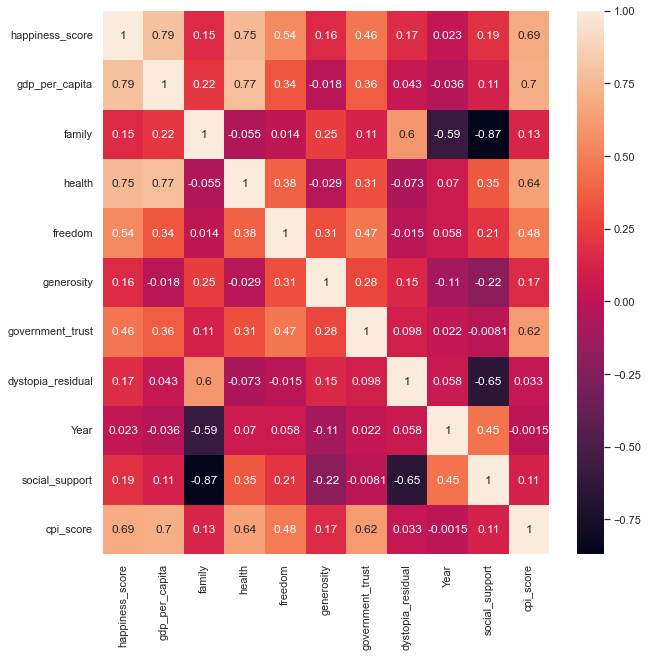

In [121]:
sns.heatmap(df.corr(),annot=True);

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
happiness_score,792.0,5.473310,1.124726,2.5669,4.590750,5.485500,6.300500,7.808700
gdp_per_capita,792.0,0.929217,0.385774,0.0000,0.644242,0.994544,1.228677,2.096000
family,792.0,0.504998,0.552736,0.0000,0.000000,0.000000,1.040410,1.610574
health,792.0,0.648691,0.232261,0.0000,0.510070,0.685397,0.815641,1.141000
freedom,792.0,0.427016,0.148003,0.0000,0.325433,0.439621,0.546280,0.724000
generosity,792.0,0.212440,0.121660,0.0000,0.125784,0.197000,0.273250,0.838075
government_trust,792.0,0.125720,0.109032,0.0000,0.052862,0.089000,0.154250,0.551910
dystopia_residual,792.0,1.379277,1.075276,0.0000,0.000000,1.731948,2.236894,3.602140
Year,792.0,2017.500000,1.708904,2015.0000,2016.000000,2017.500000,2019.000000,2020.000000
social_support,792.0,0.609302,0.640754,0.0000,0.000000,0.176214,1.268250,1.644000


In [86]:
df.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


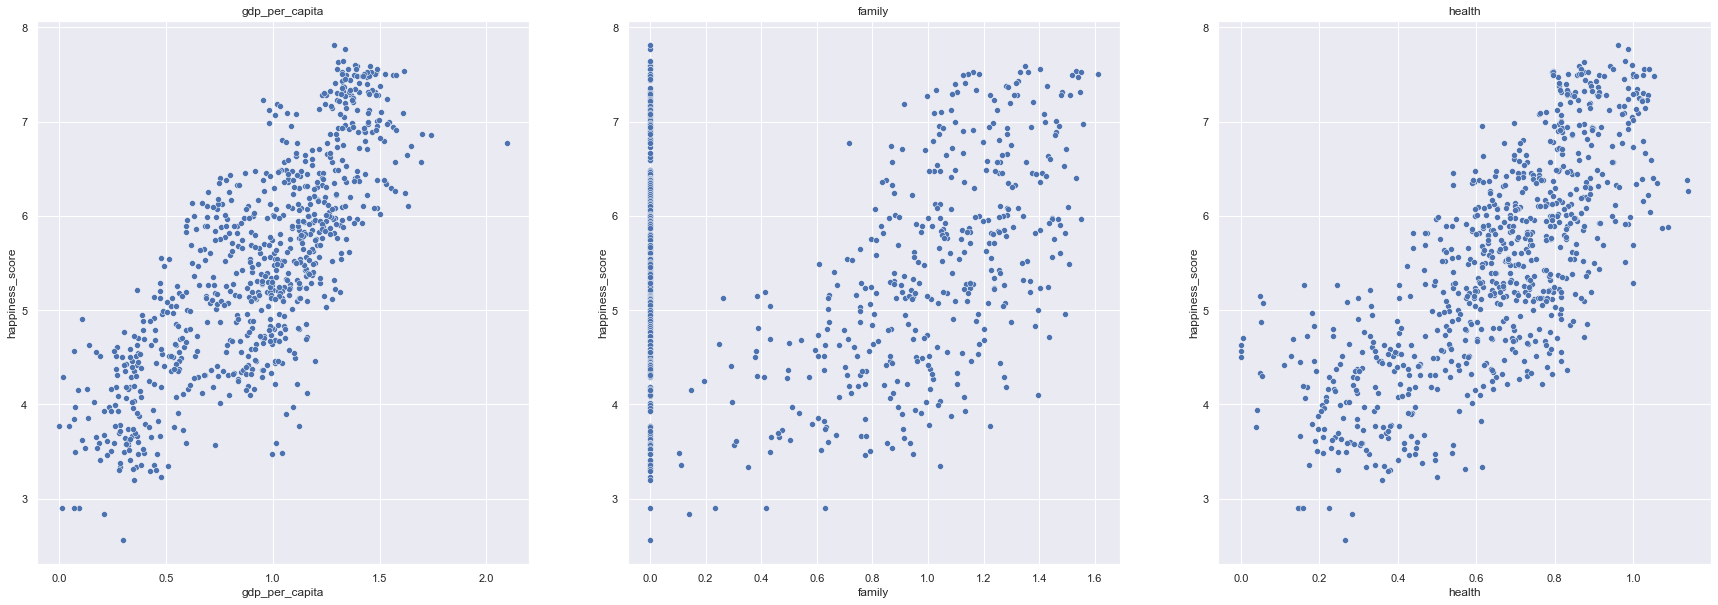

In [87]:
c=1
plt.figure(figsize=(30,10))
for i in df.columns[2:5]:
    plt.subplot(1,3,c)
    plt.title(i)
    sns.set(rc={'figure.figsize':(10,10)})
    sns.scatterplot(data=df,x=i,y='happiness_score')
    c+=1

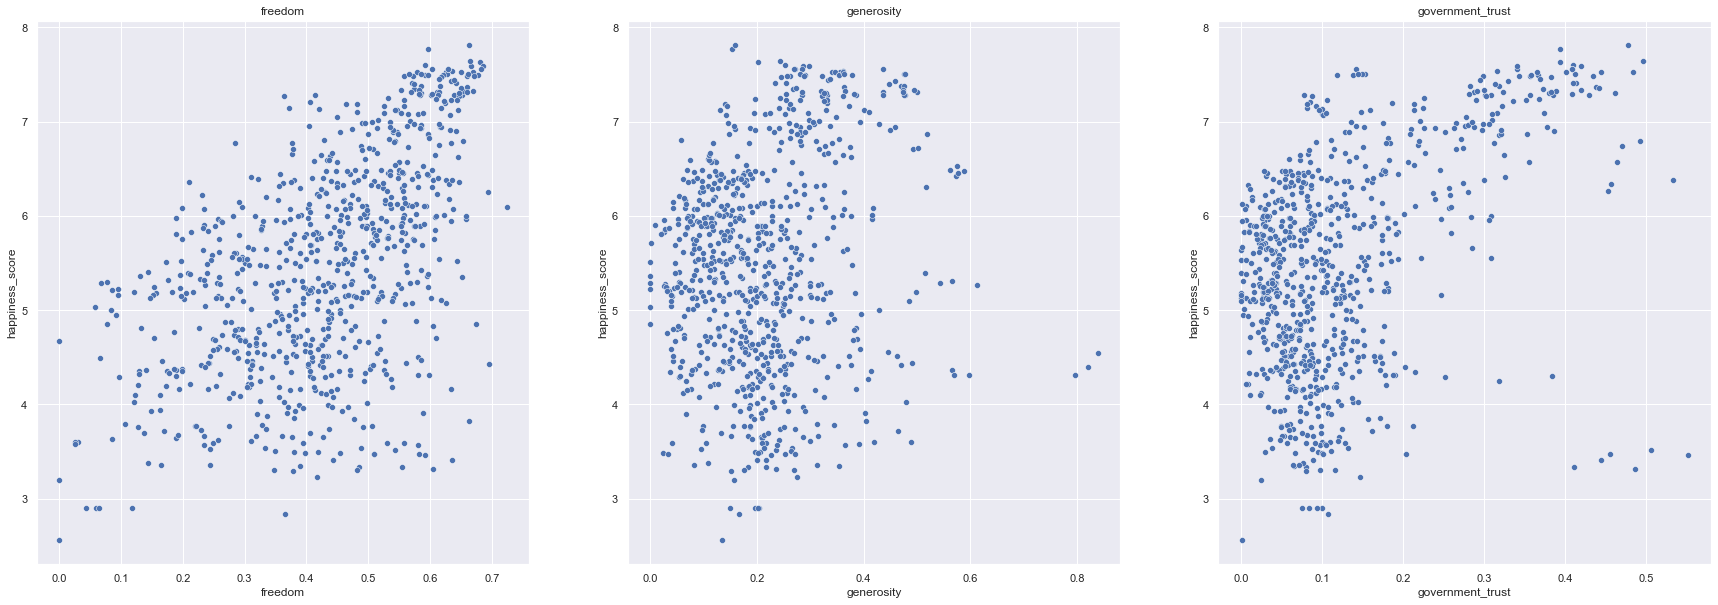

In [88]:
c=1
plt.figure(figsize=(30,10))
for i in df.columns[5:8]:
    plt.subplot(1,3,c)
    plt.title(i)
    sns.set(rc={'figure.figsize':(10,10)})
    sns.scatterplot(data=df,x=i,y='happiness_score')
    c+=1

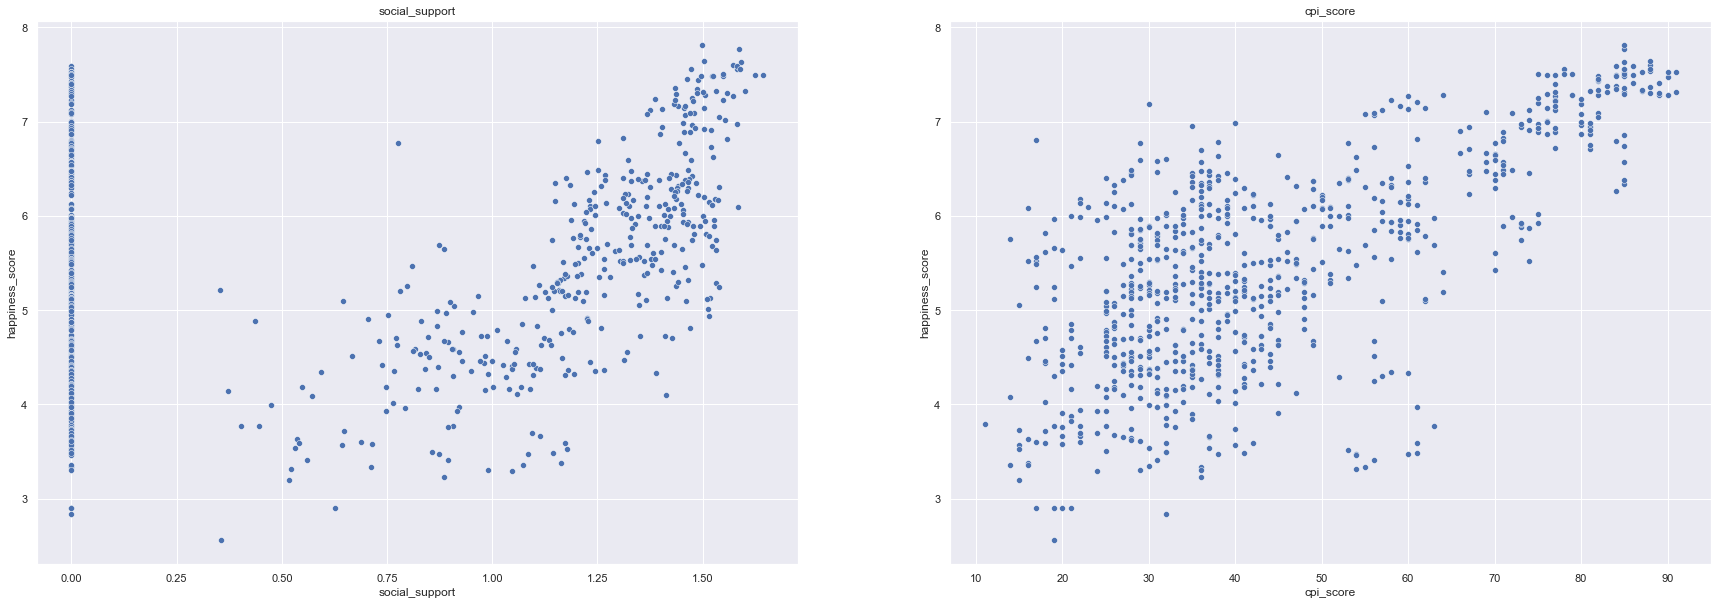

In [89]:
c=1
plt.figure(figsize=(30,10))
for i in ['social_support','cpi_score']:
    plt.subplot(1,2,c)
    plt.title(i)
    sns.set(rc={'figure.figsize':(10,10)})
    sns.scatterplot(data=df,x=i,y='happiness_score')
    c+=1

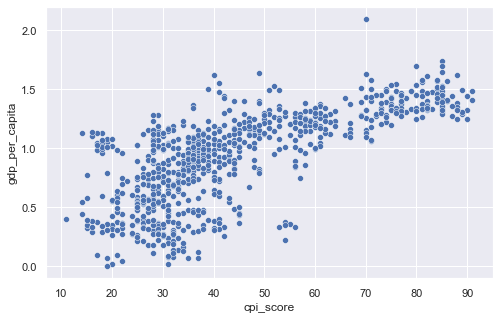

In [220]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='cpi_score',y='gdp_per_capita');

## Findings from  the above Analysis


a) Findings related to Numerical variables(Relations were infered from density plot,scatterplot and corr b/w HI vs num features)

   Correlation b/w numerical features and HI

1. GDP,Health- have high correlation b/w HI

2. freedom and CPI also have some role in determining HI (Need to verify)

3. There is correlation between GDP and CPI scores of countries

4. Plots show that there is no explicit relationship b/w  HI and 'generosity', 'government_trust' and 'social_support' (Need to verify)


In [90]:
df.columns

Index(['Country', 'happiness_score', 'gdp_per_capita', 'family', 'health',
       'freedom', 'generosity', 'government_trust', 'dystopia_residual',
       'continent', 'Year', 'social_support', 'cpi_score'],
      dtype='object')

In [91]:
df[(df.continent=='Asia')& (df.happiness_score>=7) ].groupby('Country')['happiness_score'].mean().sort_values(ascending=False)

Country
Israel    7.20512
Name: happiness_score, dtype: float64

In [92]:
df[(df.Country=='Afghanistan') | (df.Country=='Burundi')].groupby(['Country'])['happiness_score'].mean()

Country
Afghanistan    3.35515
Burundi        3.19505
Name: happiness_score, dtype: float64

In [93]:
#Now I need to further verify these correlations by analysing samples from dataset

#### Comparison b/w Happiness_score and gdp_per_capita

In [94]:
c=df[df.happiness_score>6.5]
c.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [95]:
d=df[df.happiness_score<5]
d.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
87,Nepal,4.962,0.479820,1.179283,0.504131,0.440306,0.394096,0.072976,1.891241,Asia,2015,0.0,27
88,Mongolia,4.955,1.027236,1.493011,0.557783,0.394144,0.338464,0.032902,1.111292,Asia,2015,0.0,39
89,South Africa,4.829,1.054699,1.384789,0.187080,0.479247,0.139362,0.072509,1.510909,Africa,2015,0.0,44
90,Tunisia,4.805,1.007266,0.868351,0.613212,0.289681,0.049693,0.086723,1.890251,Africa,2015,0.0,38
91,Egypt,4.735,0.989702,0.997471,0.520187,0.282110,0.128631,0.114381,1.702161,Africa,2015,0.0,36


In [96]:
#f=df[(df.happiness_score>5) & (df.happiness_score<6.5)]
#f.head()

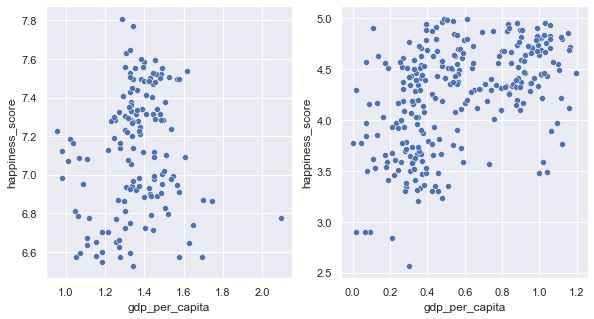

In [97]:
z=1
plt.figure(figsize=(15,5))
for i in [c,d]:
    
    plt.subplot(1,3,z)
    sns.set(rc={'figure.figsize':(5,5)})
    sns.scatterplot(data=i,x='gdp_per_capita',y='happiness_score')
    z+=1

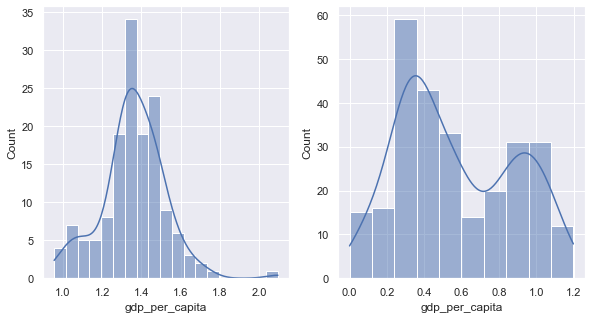

In [98]:
z=1
plt.figure(figsize=(15,5))
for i in [c,d]: 
    plt.subplot(1,3,z)
    sns.set(rc={'figure.figsize':(5,5)})
    sns.histplot(data=i,x='gdp_per_capita',kde=True)
    z+=1

### Observations from plots

1. From the above plots we can see that gdp of most of the countries having HI >7  lies between 1.2<gdp<1.6
2. Where as most of the countries having HI<5 --Gdp is below 1

#### Comparison b/w Happiness_score and CPI

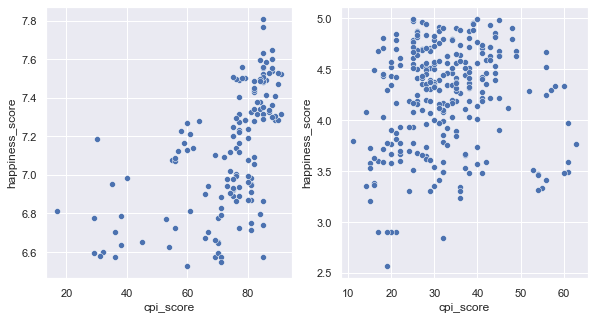

In [99]:
z=1
plt.figure(figsize=(15,5))
for i in [c,d]:
    plt.subplot(1,3,z)
    sns.set(rc={'figure.figsize':(5,5)})
    sns.scatterplot(data=i,x='cpi_score',y='happiness_score')
    z+=1

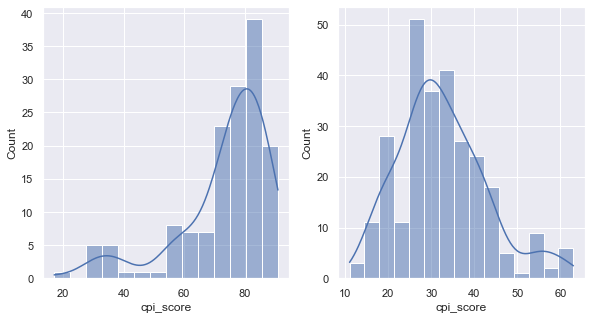

In [100]:
z=1
plt.figure(figsize=(15,5))
for i in [c,d]: 
    plt.subplot(1,3,z)
    sns.set(rc={'figure.figsize':(5,5)})
    sns.histplot(data=i,x='cpi_score',kde=True)
    z+=1

### Observations from plots

1. The CPI of  most of the countries having HI>7 lies in the range 70-90
2. The CPI of most of the countries having HI<5 lies in the range 20-45

a. So ther is some kind of correlation between HI and "Cpi_sore" of country

In [101]:
df.columns

Index(['Country', 'happiness_score', 'gdp_per_capita', 'family', 'health',
       'freedom', 'generosity', 'government_trust', 'dystopia_residual',
       'continent', 'Year', 'social_support', 'cpi_score'],
      dtype='object')

#### Comparison b/w Happiness_score and government_trust

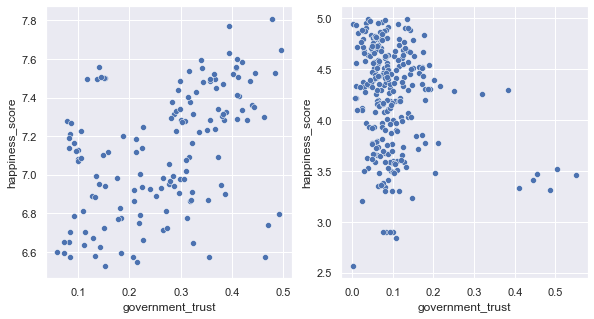

In [102]:
z=1
plt.figure(figsize=(15,5))
for i in [c,d]:
    plt.subplot(1,3,z)
    sns.set(rc={'figure.figsize':(5,5)})
    sns.scatterplot(data=i,x='government_trust',y='happiness_score')
    z+=1

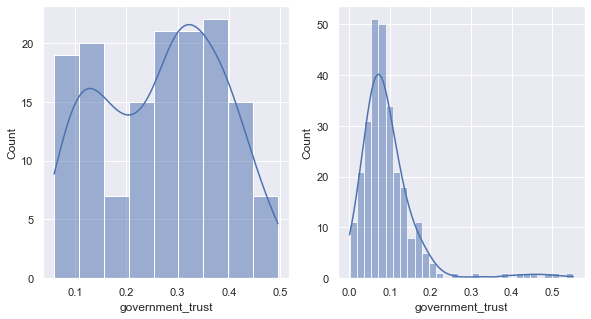

In [103]:
z=1
plt.figure(figsize=(15,5))
for i in [c,d]: 
    plt.subplot(1,3,z)
    sns.set(rc={'figure.figsize':(5,5)})
    sns.histplot(data=i,x='government_trust',kde=True)
    z+=1

### Observations from plots

1. Most of the Countries having HI<5 seems to have very low value for "government_trust" feature( lies b/w 0.0-0.1)

### Outliers Checking

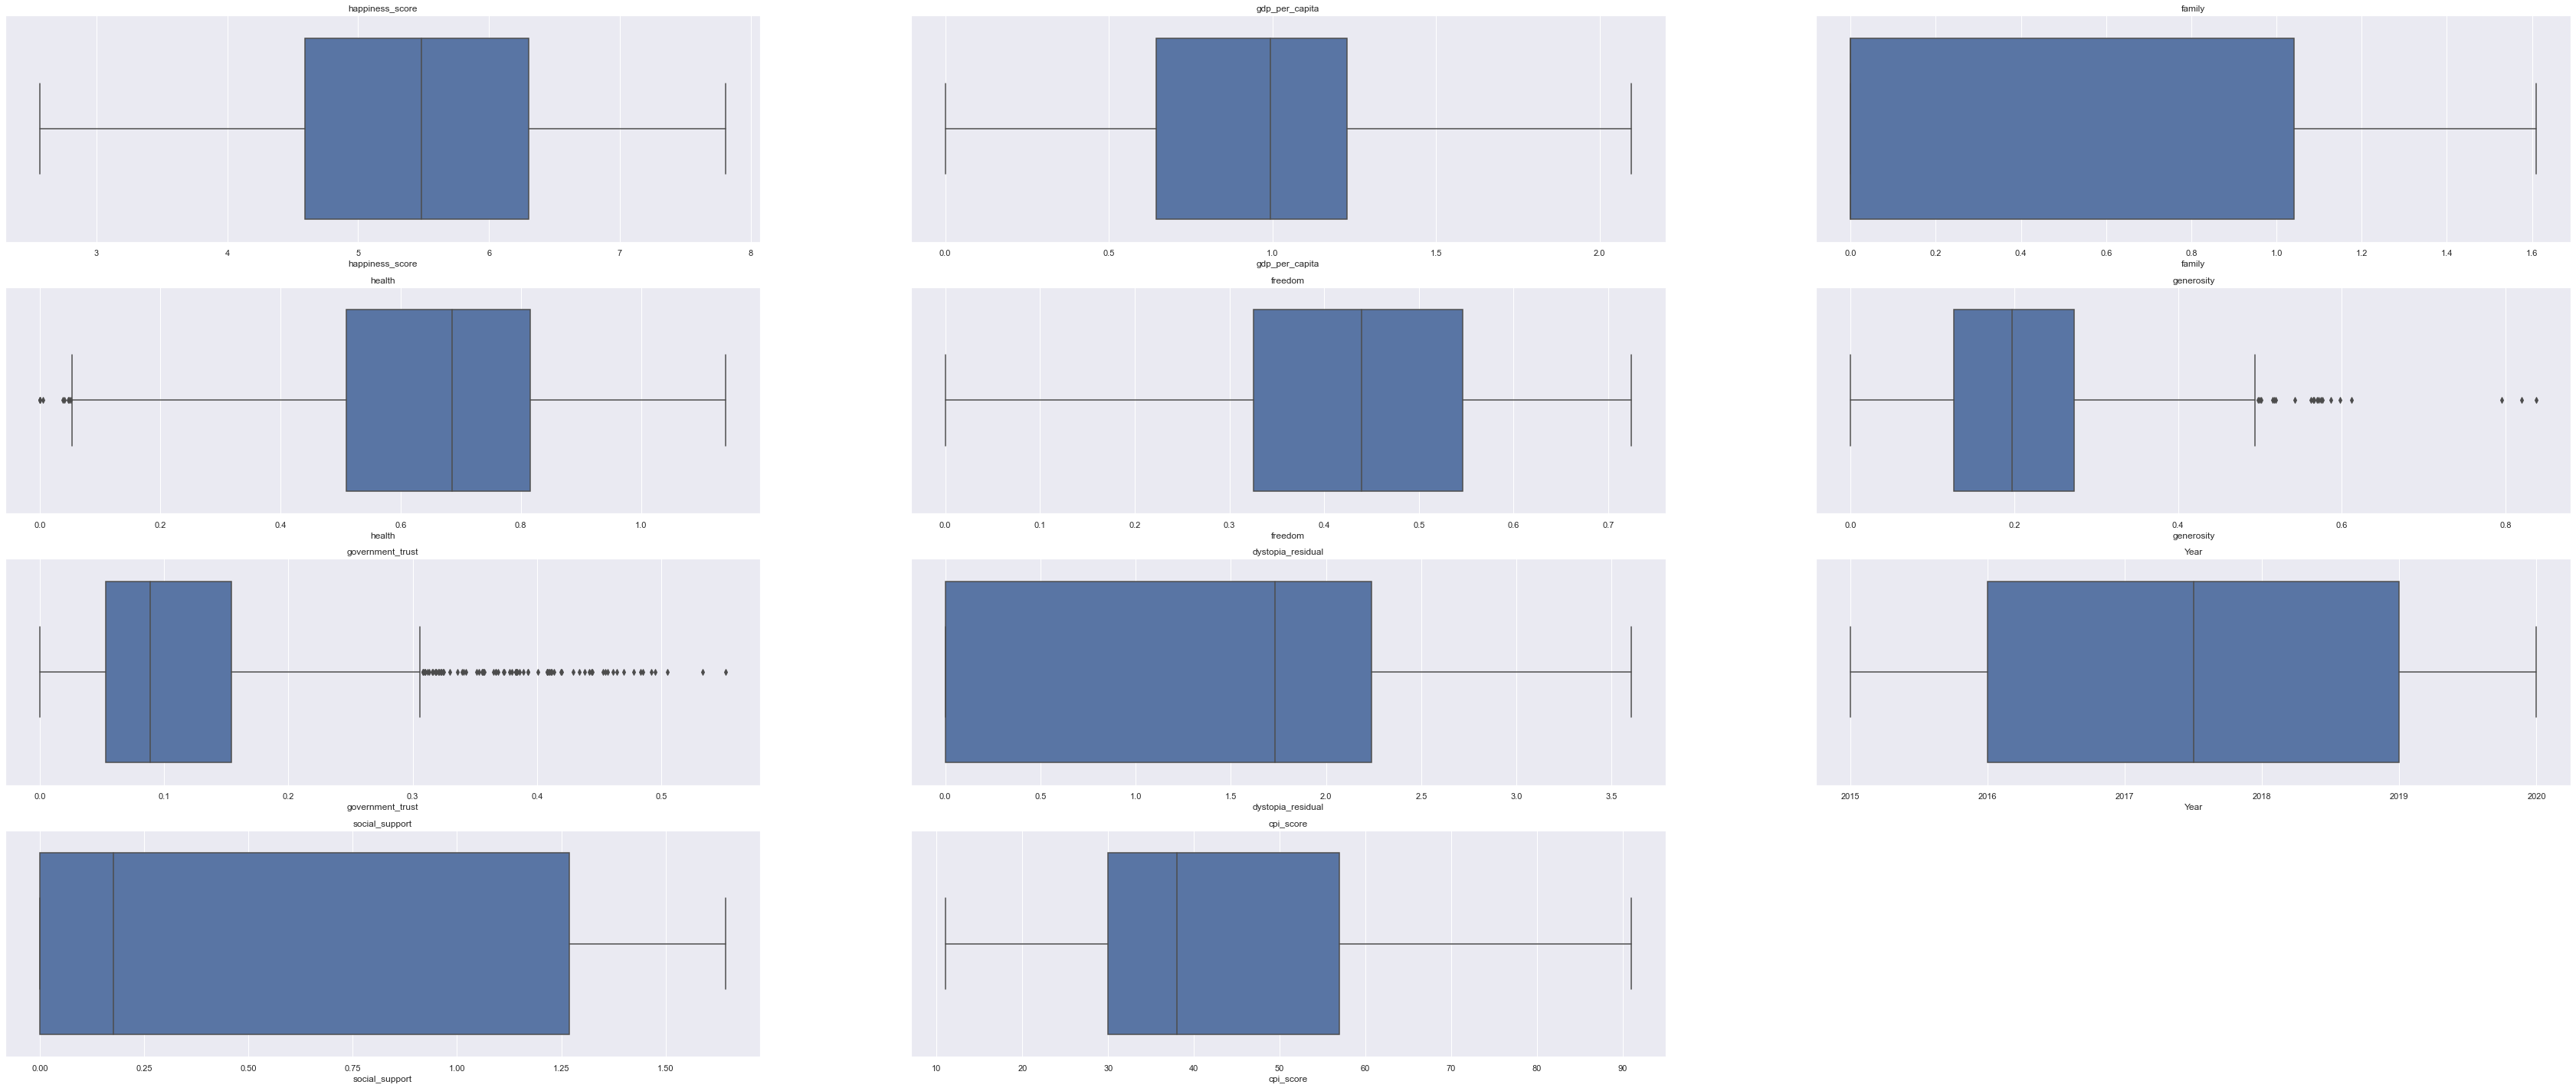

In [104]:
z=1
plt.figure(figsize=(60,25))
for i in numerical_fea:
    plt.subplot(4,3,z)
    plt.title(i)
    sns.set(rc={'figure.figsize':(10,10)})
    sns.boxplot(data=df,x=i)
    z+=1

1. There are outliers in government trust and generosity features at the right end of distribution

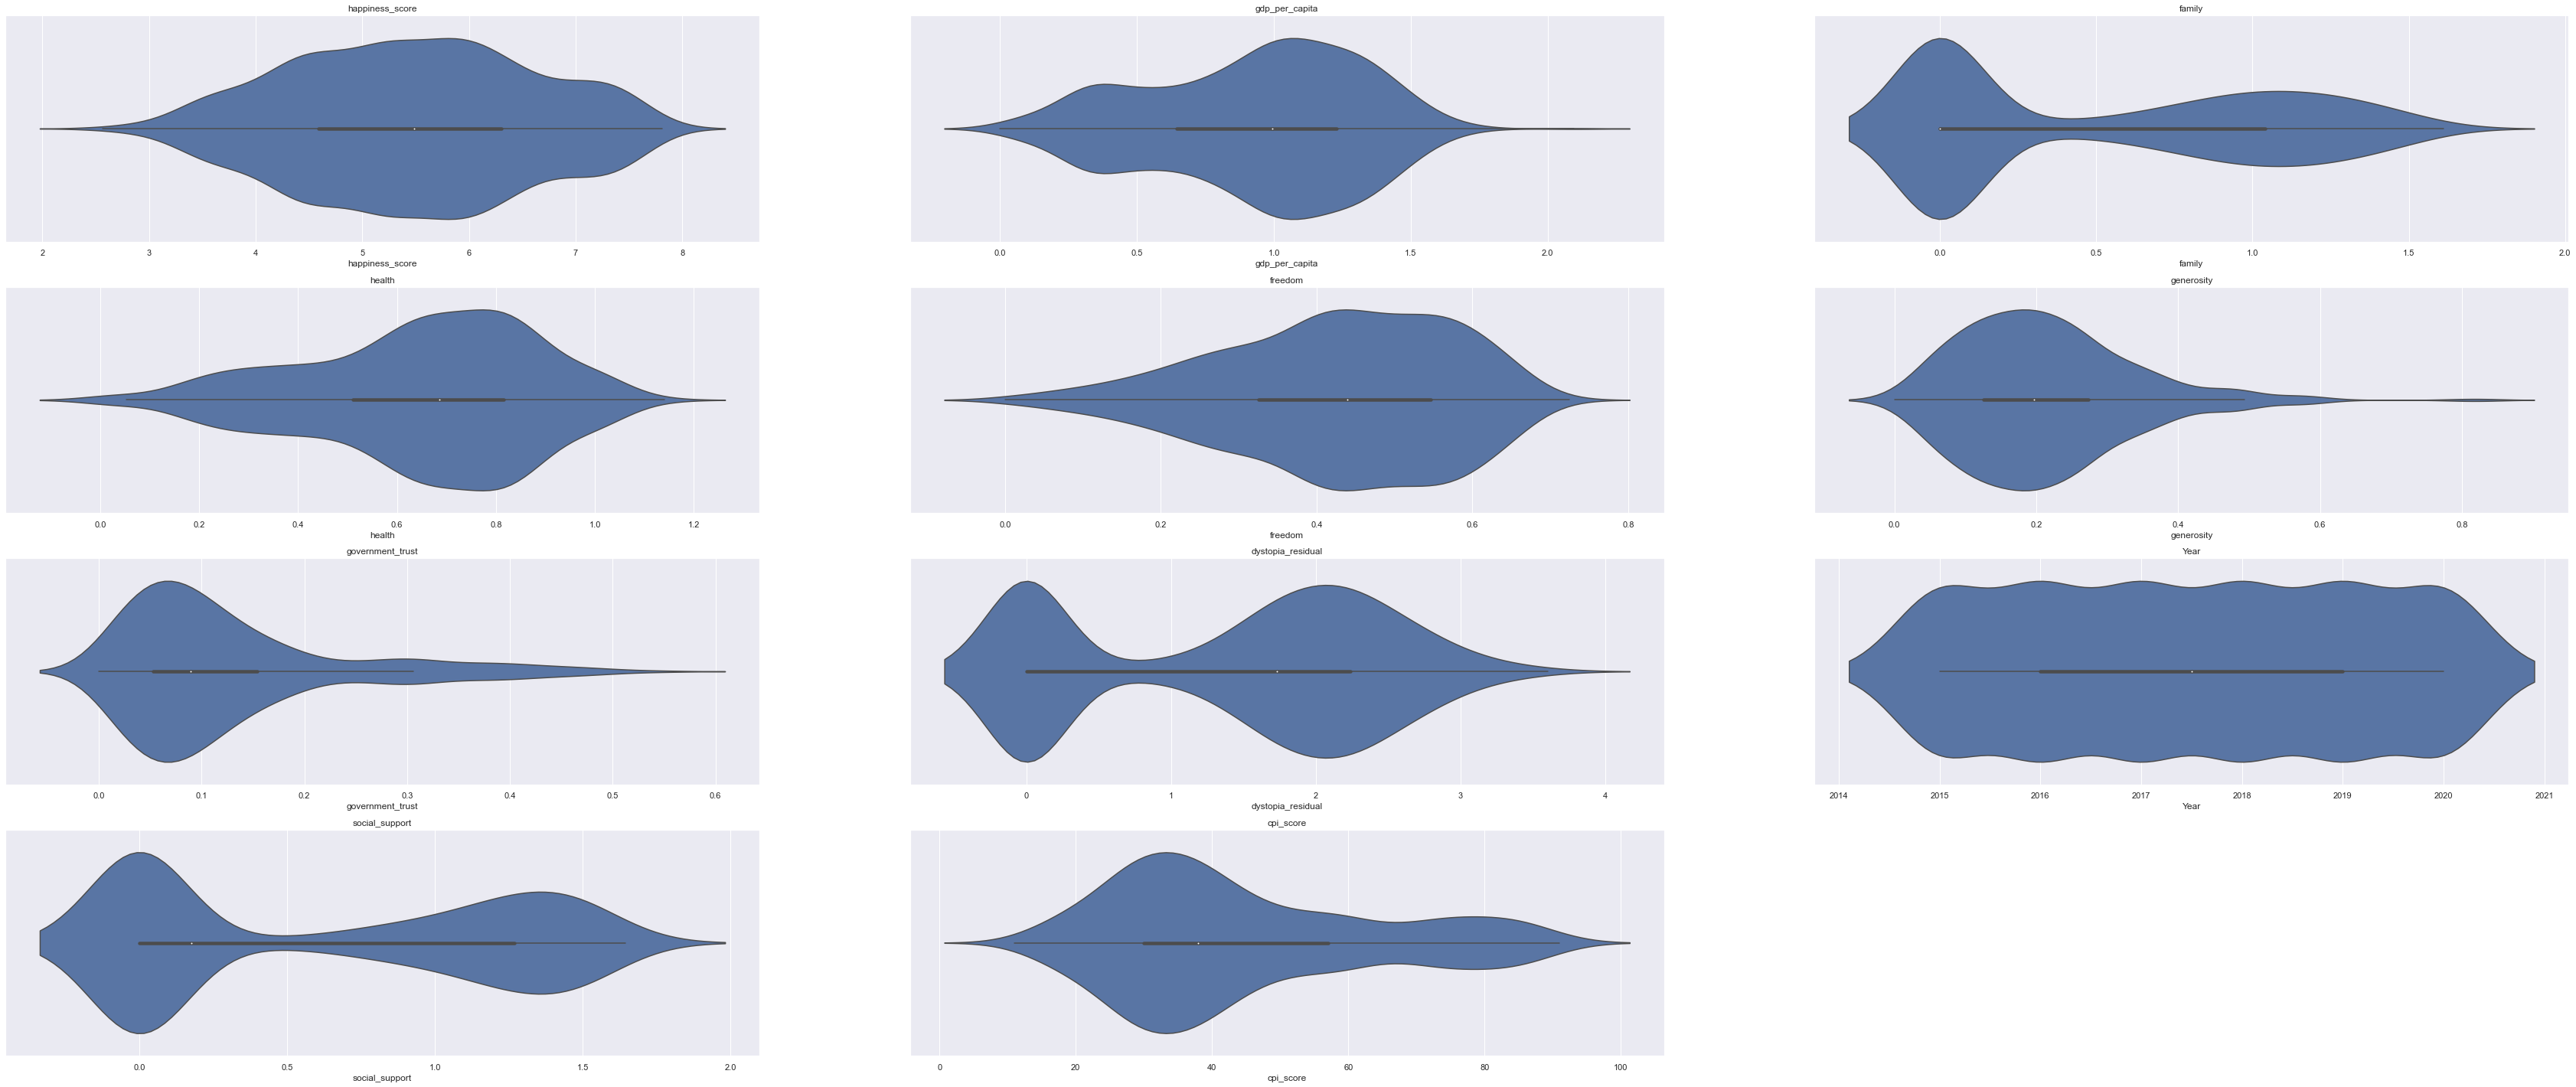

In [105]:
z=1
plt.figure(figsize=(60,25))
for i in numerical_fea:
    plt.subplot(4,3,z)
    plt.title(i)
    sns.set(rc={'figure.figsize':(10,10)})
    sns.violinplot(data=df,x=i)
    z+=1

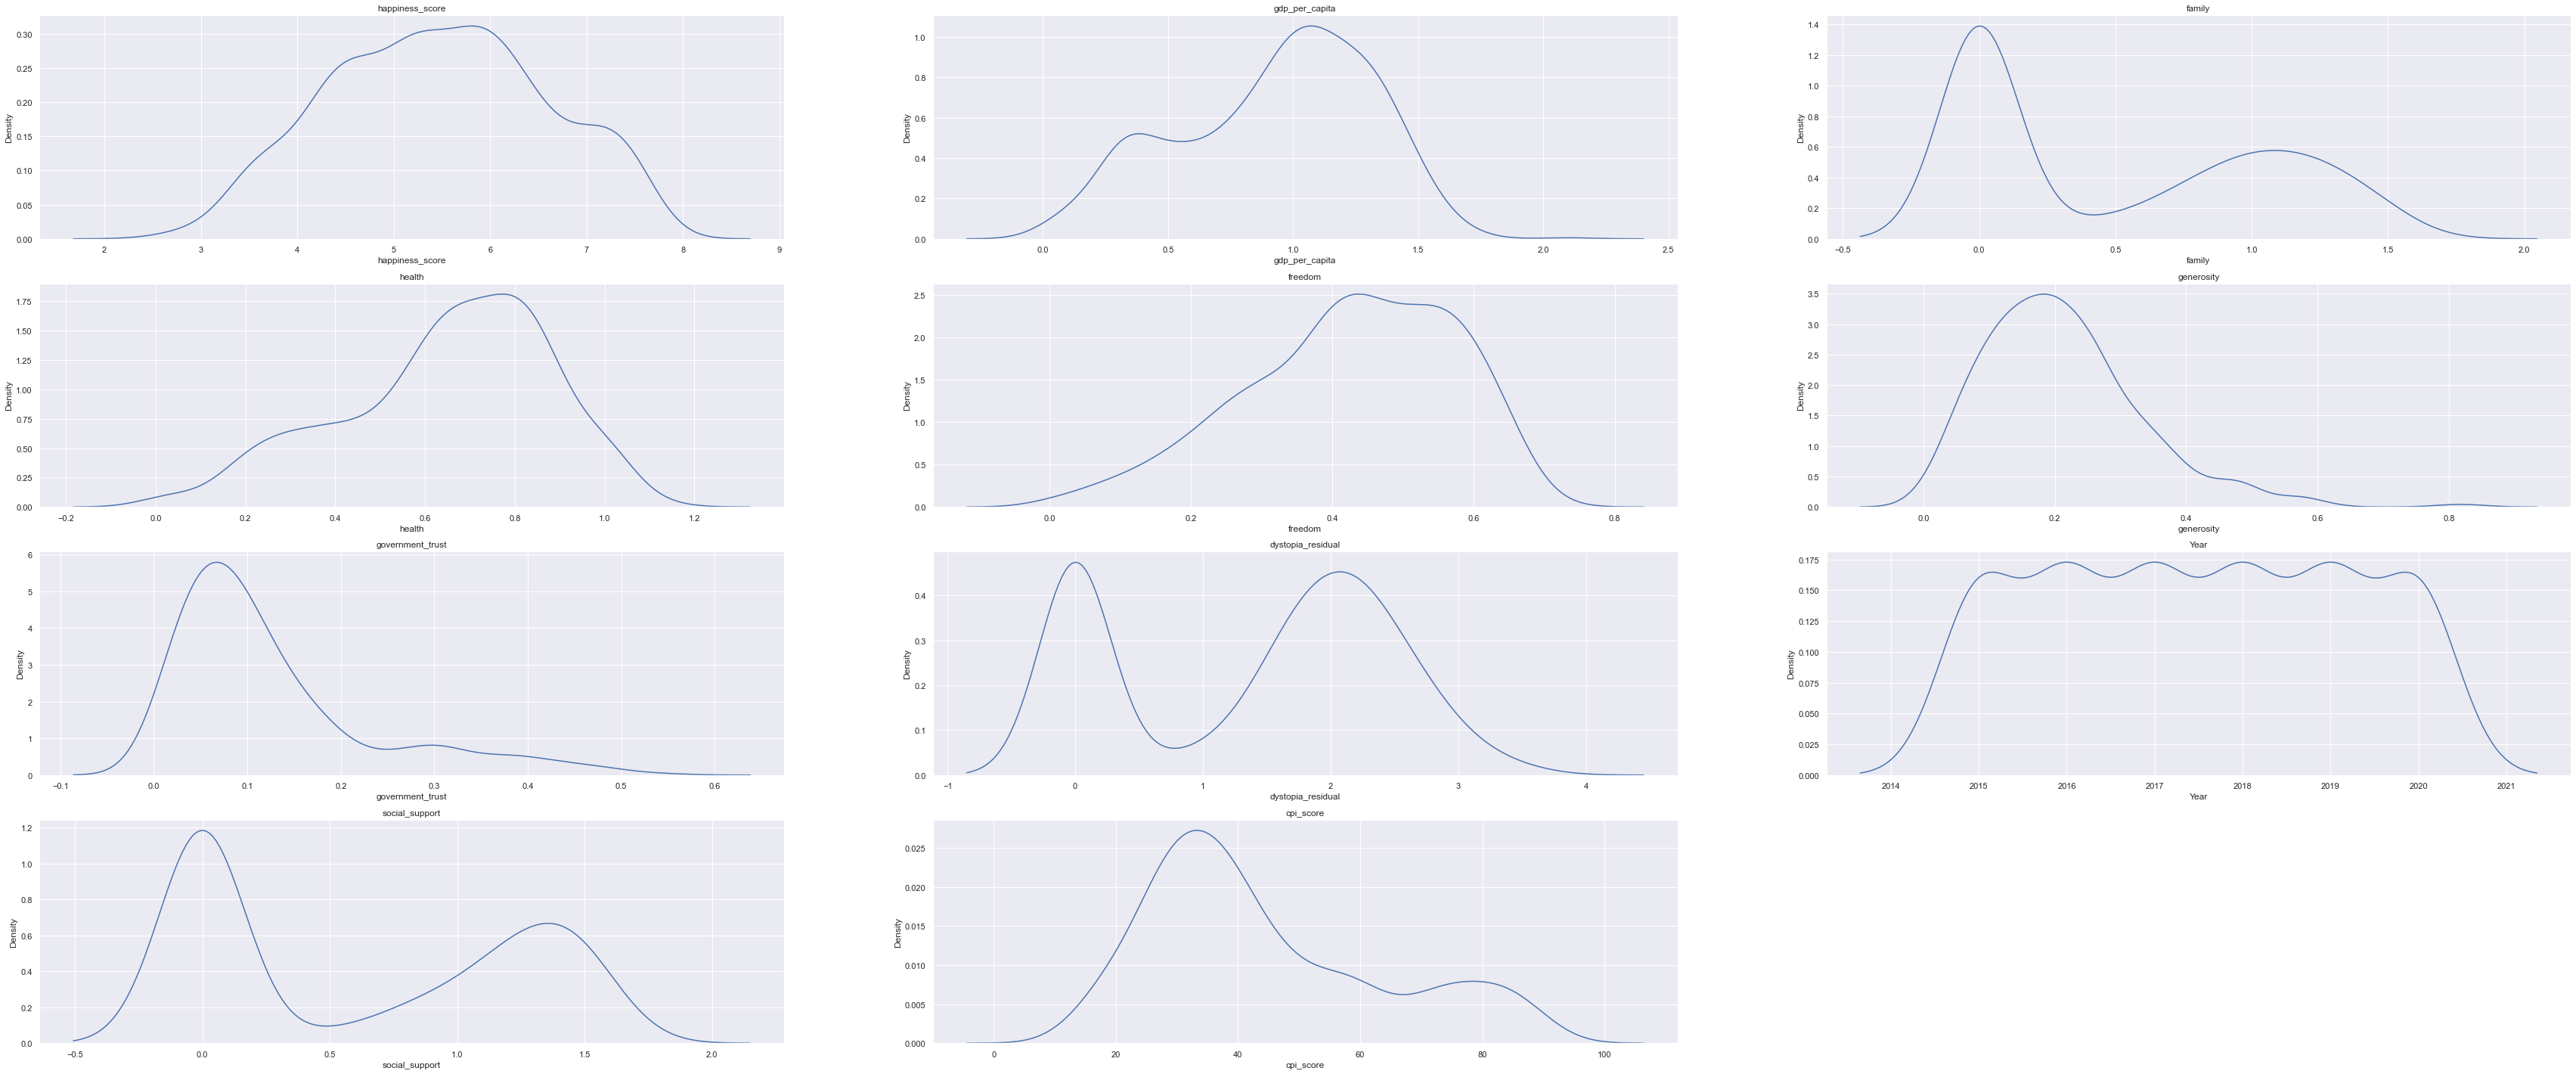

In [106]:
z=1
plt.figure(figsize=(60,25))
for i in numerical_fea:
    plt.subplot(4,3,z)
    plt.title(i)
    sns.set(rc={'figure.figsize':(10,10)})
    sns.kdeplot(data=df,x=i)
    z+=1

In [114]:
df.columns

Index(['Country', 'happiness_score', 'gdp_per_capita', 'family', 'health',
       'freedom', 'generosity', 'government_trust', 'dystopia_residual',
       'continent', 'Year', 'social_support', 'cpi_score'],
      dtype='object')

### Handling Outliers

Since the plots of "government_trust" and "generosity" features are Right skewed, IQR can be used to treat the outliers

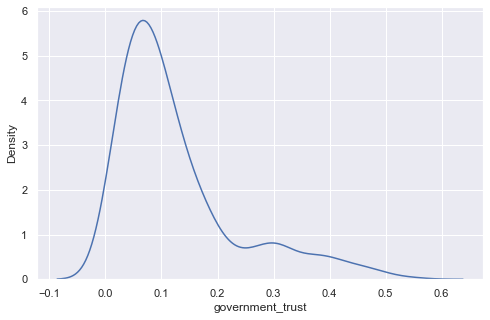

In [206]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df,x="government_trust");

In [189]:
#government_trust
q3=df["government_trust"].quantile(0.75)
q1=df["government_trust"].quantile(0.25)

IQR_gt=q3-q1
IQR_gt

0.10138749999999999

In [190]:
upper_gt=q3+1.5*IQR_gt
lower_gt=q1-1.5*IQR_gt
print(upper_gt),print(lower_gt)

0.30633125
-0.09921875


(None, None)

In [208]:
data=df.copy()

In [209]:
data.shape

(792, 13)

In [210]:
# Since the No of records are low It's better to replace the outlier values with the upper and lower fence values.

In [211]:
data.loc[data["government_trust"]>0.30,"government_trust"]=0.30
data.loc[data["government_trust"]<-0.09,"government_trust"]=-0.09

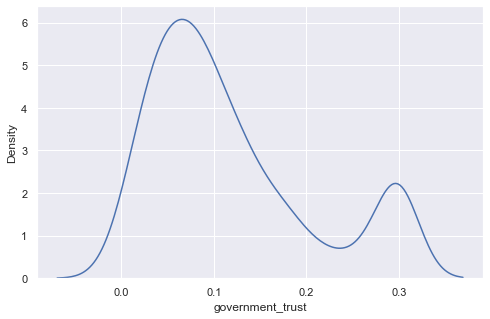

In [212]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=data,x="government_trust");

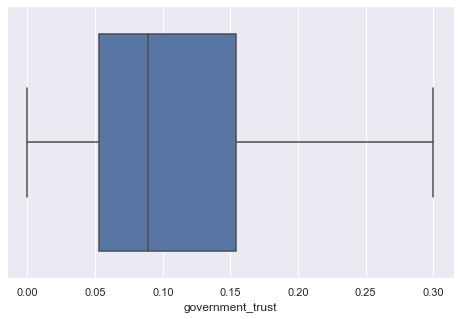

In [213]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data,x='government_trust');

In [ ]:
#It can be seen from the boxplot that the outliers are removed from government trust

In [214]:
#generousity
q3=df['generosity'].quantile(0.75)
q1=df['generosity'].quantile(0.25)

IQR_g=q3-q1
IQR_g

0.147465813

In [215]:
upper_g=q3+1.5*IQR_g
lower_g=q1-1.5*IQR_g
print(upper_g),print(lower_g)

0.4944487195
-0.09541453250000001


(None, None)

In [216]:
data=df.copy()

In [217]:
data.loc[data['generosity']>0.49,'generosity']=0.49
data.loc[data['generosity']<-0.09,'generosity']=-0.09

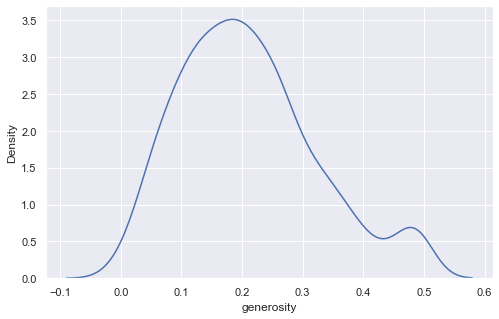

In [218]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=data,x='generosity');

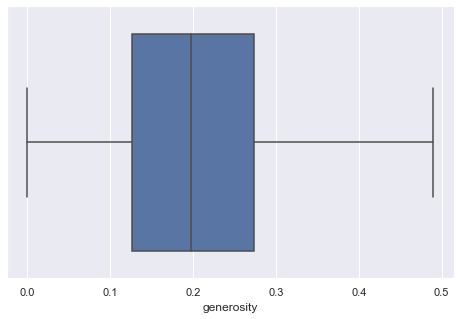

In [219]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data,x='generosity');

In [ ]:
#It can be seen from the boxplot that the outliers are removed from generosity

In [184]:
#prac

In [237]:
# plt.figure(figsize=(10,5))
# sns.kdeplot(data=df,x='government_trust');

In [ ]:
# per_99=df['government_trust'].quantile(0.90) #99-percentile
# per_01=df['government_trust'].quantile(0.01) #1-percentile
# print(per_01, per_99)

In [ ]:
#df[(df['government_trust']>per_99) | (df['government_trust']<per_01)]

In [ ]:
# df2=df.drop(df[(df['government_trust']>per_99) | (df['government_trust']<per_01)].index)
# print(len(df2))
# df2

In [ ]:
#df['government_trust'].describe()

In [ ]:
#df2['government_trust'].describe()

In [ ]:
# plt.figure(figsize=(10,5))
# sns.boxplot(data=df2,x='government_trust')


In [ ]:
# plt.figure(figsize=(10,5))
# sns.boxplot(data=df,x='government_trust')

In [238]:
# df.columns


In [234]:
# c.head()

In [235]:
# d.head()

In [233]:
# z=1
# plt.figure(figsize=(15,5))
# for i in [c,d]: 
#     plt.subplot(1,3,z)
#     sns.set(rc={'figure.figsize':(5,5)})
#     sns.scatterplot(data=i,x='social_support',y='happiness_score')
#     z+=1